In [37]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import matplotlib.pyplot as plt
import numpy as np
from grating import *
from ext_signal import *

In [39]:
stimulus_fn = 'stimulus.bin'
video_fn = 'color_br'
crest = [255,0,0]
valley = [0,255,0]
buffer_ecc = 1.0
range_ecc = 2.5
SF = 4
TF = 8
orient = np.pi/4
                                 #SF  TF
LMS_series = generate_grating(1.0, SF, TF, orient, 256, crest, valley, video_fn, sharpness=1, frameRate = 60, ecc = range_ecc, buffer_ecc = buffer_ecc, gtype='drifting')
#start = 0
#end = 60
#LMS_inRGB = video_to_LMS_time_series('test', start, end)
print(LMS_series.shape)
print(np.min(LMS_series))
print(np.max(LMS_series))
with open(stimulus_fn, 'wb') as f:
    np.array([LMS_series.shape[0], LMS_series.shape[2], LMS_series.shape[3]], dtype='i4').tofile(f)
    mean_value = np.array([np.mean(LMS_series[:,0,:,:]), np.mean(LMS_series[:,1,:,:]), np.mean(LMS_series[:,2,:,:])])
    mean_value.astype('f4').tofile(f) # init_luminance
    np.array([buffer_ecc, range_ecc], dtype='f4').tofile(f)
    LMS_series.astype('f4').tofile(f)
print(mean_value)

60 frames in total
sharpness=1
(60, 3, 256, 256)
0.0
0.9999999999994782
[0.5 0.5 0. ]


In [33]:
# cyclop
stimulus_fn = 'uniform_cyclop.bin'
video_fn = 'color_grating_cyclop'
crest = [255,0,0]
valley = [0,255,0]
buffer_deg = 0.4
range_deg = 0.25 # eccentricity from the origin
SF = 4
TF = 8
orient = np.pi/4

LMS_series = generate_cyclop(1.0, SF, TF, orient, 256, crest, valley, video_fn, sharpness=1, frameRate = 60, ecc = range_deg, buffer_ecc = buffer_deg, gtype='drifting')
#start = 0
#end = 60
#LMS_inRGB = video_to_LMS_time_series('test', start, end)
print(LMS_series.shape)
print(np.min(LMS_series))
print(np.max(LMS_series))
with open(stimulus_fn, 'wb') as f:
    np.array([LMS_series.shape[0], LMS_series.shape[2], LMS_series.shape[3]], dtype='i4').tofile(f)
    mean_value = np.array([np.mean(LMS_series[:,0,:,:]), np.mean(LMS_series[:,1,:,:]), np.mean(LMS_series[:,2,:,:])])
    mean_value.astype('f4').tofile(f) # init_luminance
    np.array([buffer_deg, range_deg], dtype='f4').tofile(f)
    LMS_series.astype('f4').tofile(f)
print(mean_value)

60 frames in total
sharpness=1
(60, 3, 256, 256)
0.0
0.999999999859654
[0.5 0.5 0. ]


In [4]:
precision = 'f4'

In [7]:
#output = "C:/Users/gueux/source/repos/patchV11/x64/Debug/storage.bin"
#output = "C:/Users/gueux/source/repos/patchV11/patchV11/LGN_gallery.bin"
output = "C:/Users/gueux/patchV1/src/LGN_gallery.bin"
with open(output, 'rb') as f:
    nLGN = np.fromfile(f, 'u4', 1)[0]
    nType = np.fromfile(f, 'u4', 1)[0]
    nKernelSample = np.fromfile(f, 'u4', 1)[0]
    nSample = np.fromfile(f, 'u4', 1)[0]
    max_convol = np.fromfile(f, 'f4', nLGN)
    tw = np.fromfile(f, 'f4', nLGN*nType*nKernelSample).reshape((nLGN,nType,nKernelSample))
    #np.fromfile(f, precision, nLGN*nType*nKernelSample) # skip
    sw = np.fromfile(f, 'f4', nSample)
    sc = np.fromfile(f, 'f4', 2*nLGN*nType*nSample).reshape((2,nLGN,nType,nSample))
print(f'nLGN = {nLGN}, nType = {nType}, nKernelSample = {nKernelSample}, nSample = {nSample}')

nLGN = 185133, nType = 2, nKernelSample = 256, nSample = 256


In [8]:
print(f'Ix = {[np.min(sc[0,:37027,:,:]), np.max(sc[0,:37027,:,:])]}')
print(f'Cx = {[np.min(sc[0,37027:,:,:]), np.max(sc[0,37027:,:,:])]}')
print(f'Iy = {[np.min(sc[1,:37027,:,:]), np.max(sc[1,:37027,:,:])]}')
print(f'Cy = {[np.min(sc[1,37027:,:,:]), np.max(sc[1,37027:,:,:])]}')

Ix = [0.019496715, 0.47844073]
Cx = [0.50969005, 0.9862029]
Iy = [0.1452971, 0.861973]
Cy = [0.13839488, 0.8561099]


In [15]:
#output = "C:/Users/gueux/source/repos/patchV11/x64/Debug/LGN.bin"
output = "C:/Users/gueux/source/repos/patchV11/patchV11/LGN.bin"
#output = "LGN.bin"
precision = 'f4'
with open(output, 'rb') as f:
    LGN_type = np.fromfile(f, 'u4', nLGN)
    LGN_polar = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    LGN_ecc = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    LGN_rw = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    LGN_rh = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    LGN_orient = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    LGN_k = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    LGN_ratio = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    tau_R = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    tau_D = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    nR = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    nD = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    delay = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)
    spont = np.fromfile(f, precision, nLGN)
    c50 = np.fromfile(f, precision, nLGN)
    sharpness = np.fromfile(f, precision, nLGN)
    coneType = np.fromfile(f, 'u4', 2*nLGN).reshape(2,nLGN)

print(f'LGN_type[{np.min(LGN_type)},{np.max(LGN_type)}]')

print(f'center: ecc[{np.min(LGN_ecc[0,:])},{np.max(LGN_ecc[0,:])}], polar[{np.min(LGN_polar[0,:])}, {np.max(LGN_polar[0,:])}]')
print(f'center: rh[{np.min(LGN_rh[0,:])},{np.max(LGN_rh[0,:])}], rw[{np.min(LGN_rw[0,:])}, {np.max(LGN_rw[0,:])}]')
print(f'surround: ecc[{np.min(LGN_ecc[1,:])},{np.max(LGN_ecc[1,:])}], polar[{np.min(LGN_polar[1,:])}, {np.max(LGN_polar[1,:])}]')
print(f'surround: rh[{np.min(LGN_rh[1,:])},{np.max(LGN_rh[1,:])}], rw[{np.min(LGN_rw[1,:])}, {np.max(LGN_rw[1,:])}]')

print(f'k[{np.min(LGN_k)},{np.max(LGN_k)}], orient[{np.min(LGN_orient)}, {np.max(LGN_orient)}]')
print(f'ratio[{np.min(LGN_ratio)},{np.max(LGN_ratio)}]')
print(f'tau_R[{np.min(tau_R)},{np.max(tau_R)}], tau_D[{np.min(tau_D)}, {np.max(tau_D)}]')
print(f'nR[{np.min(nR)},{np.max(nR)}], nD[{np.min(nD)}, {np.max(nD)}]')
print(f'delay[{np.min(delay)},{np.max(delay)}], spont[{np.min(spont)}, {np.max(spont)}]')
print(f'c50[{np.min(c50)},{np.max(c50)}], sharpness[{np.min(sharpness)}, {np.max(sharpness)}]')
print(f'coneType[{np.min(coneType)},{np.max(coneType)}]')

LGN_type[0,3]
center: ecc[3.244655090384185e-05,0.043584566563367844], polar[-1.568656325340271, 1.568656325340271]
center: rh[2.602082531666383e-06,0.0010978919453918934], rw[2.6177149266004562e-06, 0.0011071688495576382]
surround: ecc[-0.0003126503142993897,0.04401923716068268], polar[-3.9988489151000977, 3.044422149658203]
surround: rh[1.308501396124484e-06,0.00739141833037138], rw[1.2977980077266693e-06, 0.0072767725214362144]
k[-101.9828109741211,150.24490356445312], orient[2.3443262762157246e-06, 3.141582489013672]
ratio[4.9173831939697266e-06,1.4224729537963867]
tau_R[0.4681284427642822,5.4403462409973145], tau_D[0.5819151401519775, 37.03763198852539]
nR[10.31198501586914,59.22858428955078], nD[1.667086124420166, 83.02603912353516]
delay[2.9347009658813477,33.31131362915039], spont[0.029729045927524567, 0.129200741648674]
c50[0.12141090631484985,0.378238320350647], sharpness[5.740192890167236, 14.277532577514648]
coneType[0,1]


1.0
1.0


" The frame of visual field, left and right\nextent = 2*(buffer_ecc+range_ecc)\nax.plot(buffer_ecc/extent*np.ones((2,)), [0,1], ':r', lw = 0.5)\nax.plot((buffer_ecc/extent+0.5)*np.ones((2,)), [0,1], ':r', lw = 0.5)\nax.plot([0,1], buffer_ecc/extent*np.ones((2,)), ':k', lw = 0.5)\nax.plot([0,1], (1-buffer_ecc/extent)*np.ones((2,)), ':k', lw = 0.5)\nax.plot([0,1], (0.5+2.5/extent)*np.ones((2,)), ':r', lw = 0.5)\nax.plot([0,1], (0.5-2.5/extent)*np.ones((2,)), ':r', lw = 0.5)\nax.plot([0,1], 0.5*np.ones((2,)), ':y', lw = 0.5)\nax.plot(0.5*np.ones((2,)), [0,1], 'k', lw = 0.5)\nax.plot(np.zeros((2,)), [0,1], 'k', lw = 0.5)\nax.plot(np.ones((2,)), [0,1], 'k', lw = 0.5)\nax.set_xlim(0,1)\nax.set_ylim(0,1)\n"

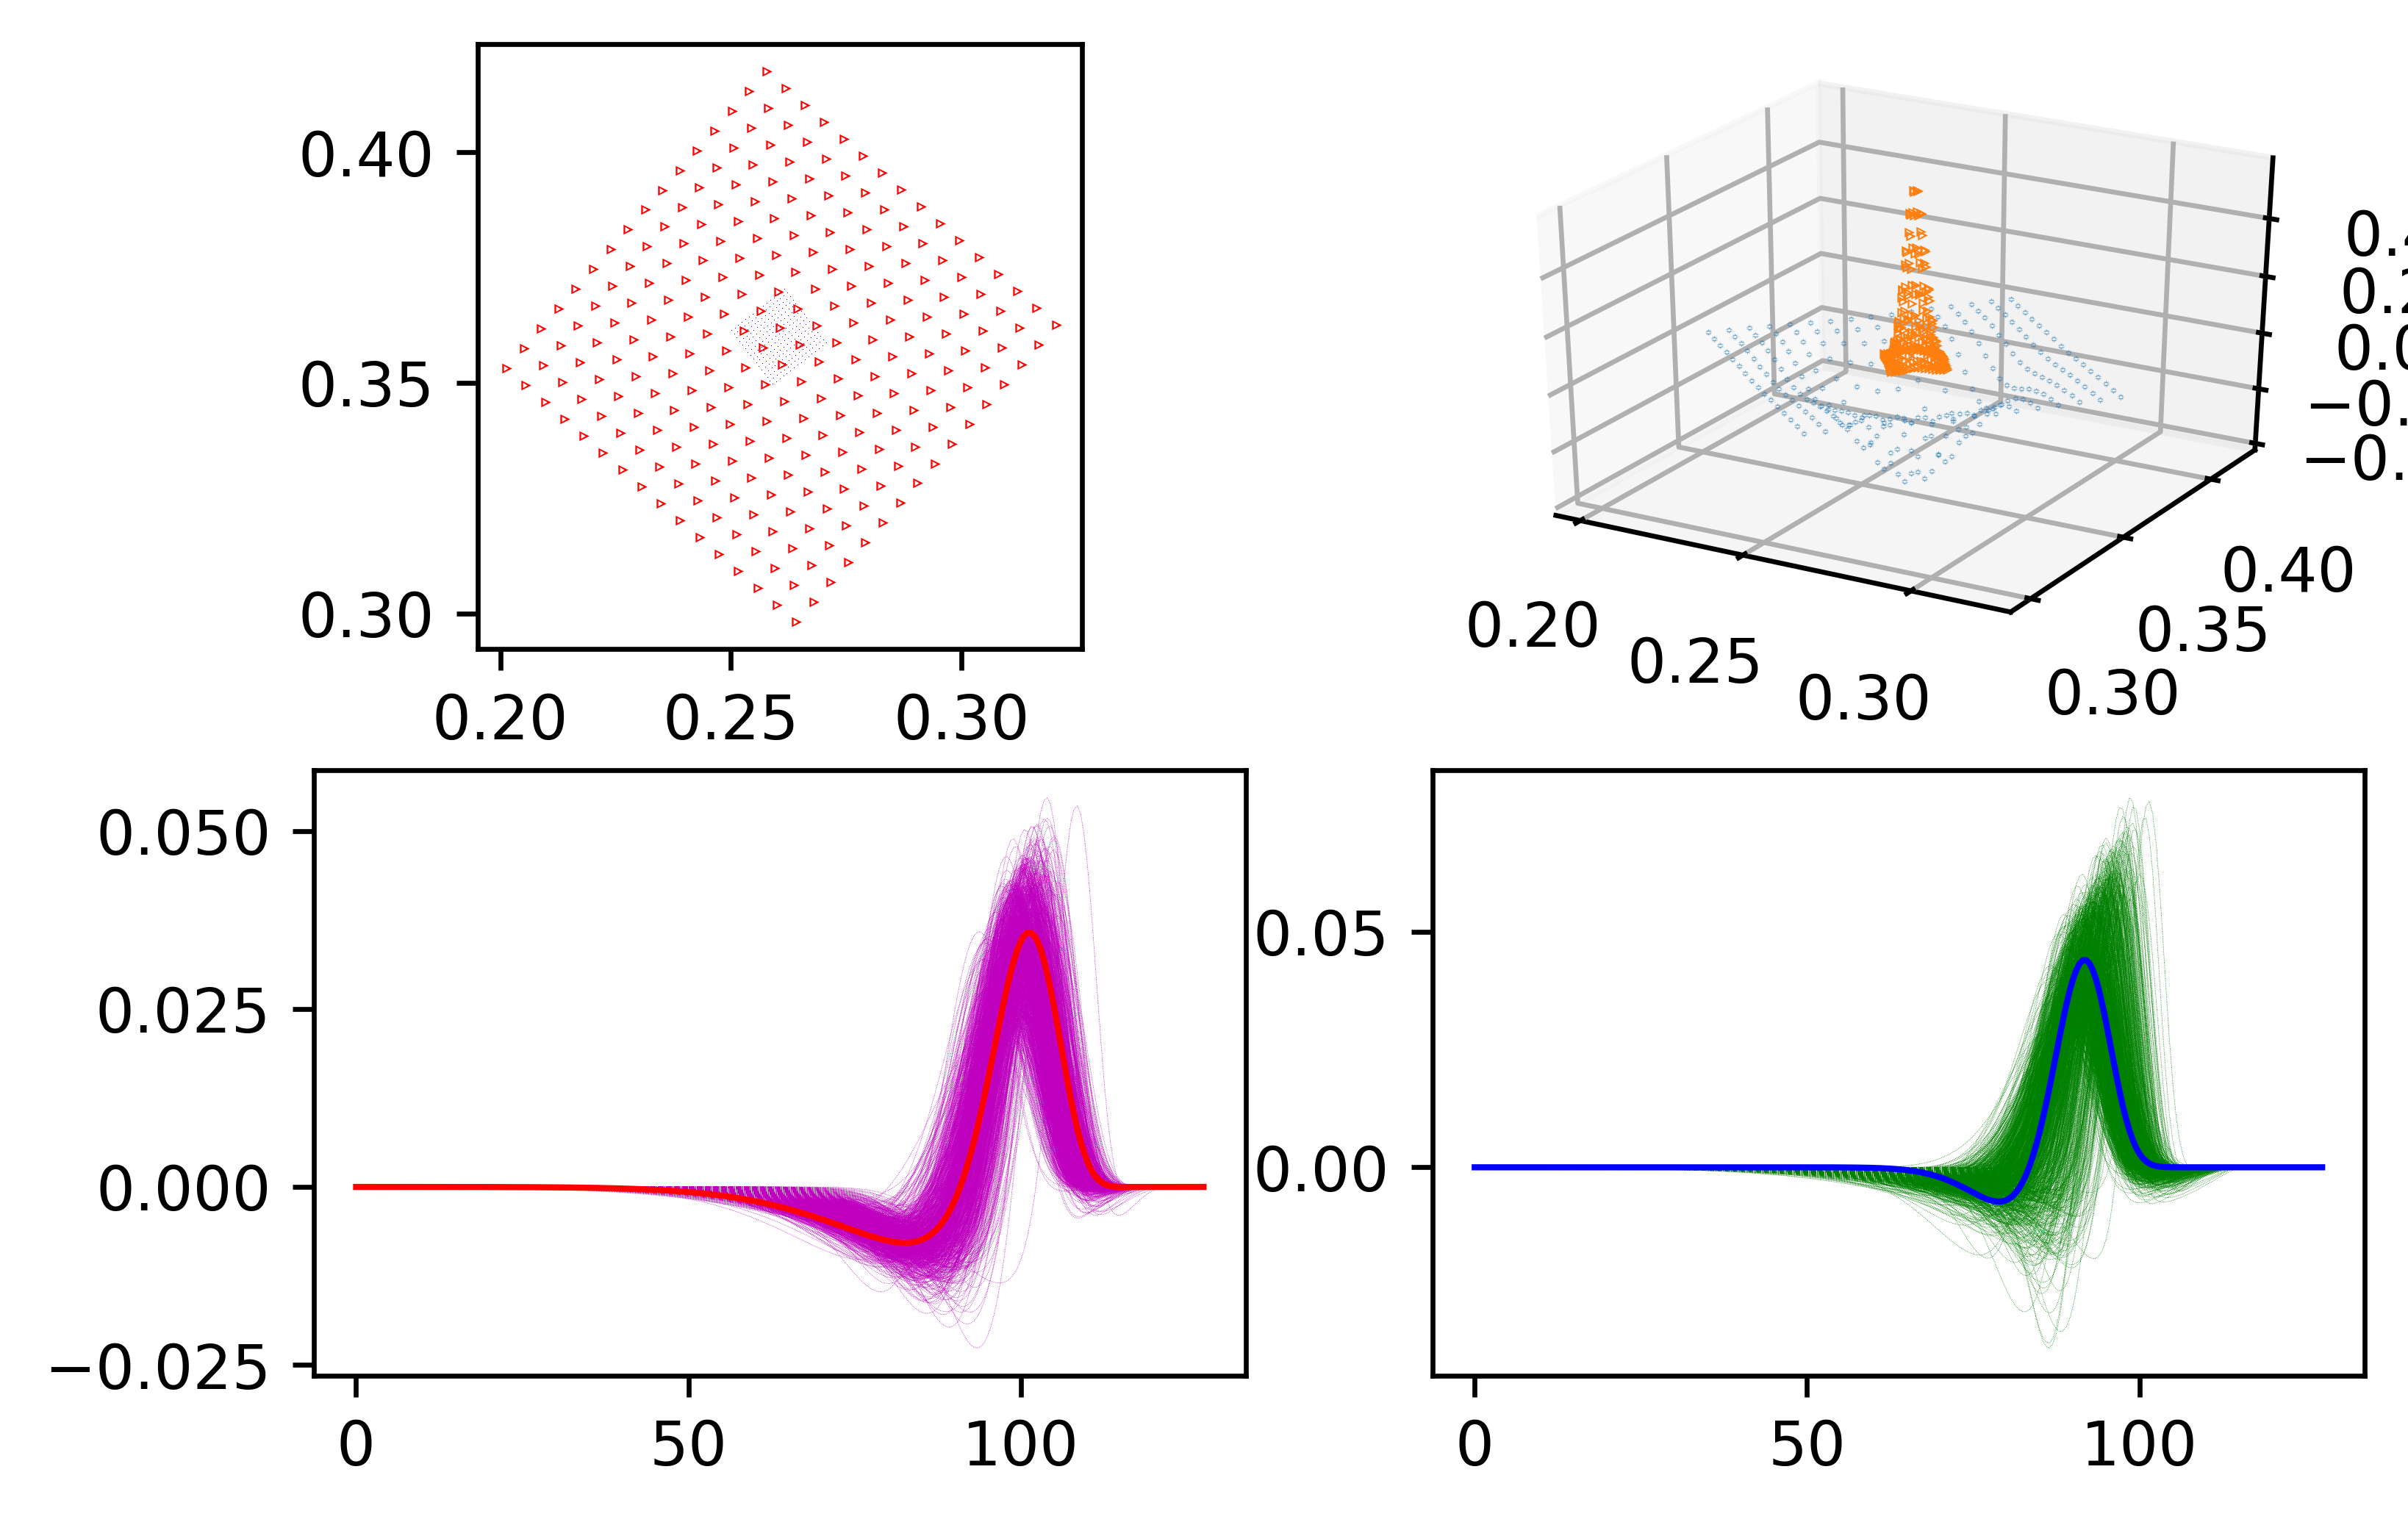

In [21]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure('check', dpi = 600)
ax = fig.add_subplot(221)
i = np.random.randint(nLGN, size=1)[0]
i = 25088
#i = 103614
ax.plot(sc[0,i,0,:], sc[1,i,0,:], ',b')
ax.plot(sc[0,i,1,:], sc[1,i,1,:], '>r', ms = 0.0002)
ax.set_aspect('equal')

nSample1D = int(np.sqrt(nSample));
ax = fig.add_subplot(222, projection = '3d')
ax.plot3D(sc[0,i,0,:], sc[1,i,0,:], sw * LGN_k[0,i], '>', ms = 0.001)
ax.plot3D(sc[0,i,1,:], sc[1,i,1,:], sw * LGN_k[1,i], '*', ms = 0.001)

print(np.sum(sw[:]))
print(np.sum(sw[:]))
#ax.plot3D(sc[0,i,0,:], sc[1,i,0,:], sw[i,0,:], '*', ms = 0.001)
#ax.plot_surface(sc[0,i,0,:].reshape((nSample1D,nSample1D)), sc[1,i,0,:].reshape((nSample1D,nSample1D)), sw[i,0,:].reshape((nSample1D,nSample1D)), cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.plot_surface(sc[0,i,1,:].reshape((nSample1D,nSample1D)), sc[1,i,1,:].reshape((nSample1D,nSample1D)), sw[i,1,:].reshape((nSample1D,nSample1D)), cmap=cm.coolwarm, linewidth=0, antialiased=True)
#'''
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)
t = np.arange(nKernelSample)*250.0/500.0
for j in np.random.randint(0,nLGN,(1000,)):
    if i == j:
        continue
    ax1.plot(t, tw[j,0,:], ':m', lw = 0.1)
    ax2.plot(t, tw[j,1,:], ':g', lw = 0.1)

ax1.plot(t, tw[i,0,:], 'r', lw = 1.0)
ax2.plot(t, tw[i,1,:], 'b', lw = 1.0)

'''
idlistC = []
idlistS = []
for i in range(nLGN):
    if np.min(tw[i,0,:]) < -0.1:
        idlistC.append(i)
        ax1.plot(t, tw[i,0,:], 'r', lw = 0.1)
    if np.min(tw[i,1,:]) < -0.1:
        ax2.plot(t, tw[i,1,:], 'b', lw = 0.1)#
        idlistS.append(i)

print(f'{np.min(tau_D[0,idlistC])}, {np.max(tau_D[0,idlistC])}')
print(f'{np.min(tau_D[0,idlistC]*(nD[0,idlistC]-1))}, {np.max(tau_D[0,idlistC]*(nD[0,idlistC]-1))}')
print(f'{np.min(tau_D[1,idlistS])}, {np.max(tau_D[1,idlistS])}')
print(f'{np.min(tau_D[1,idlistS]*(nD[1,idlistS]-1))}, {np.max(tau_D[1,idlistS]*(nD[1,idlistS]-1))}')
#i = 1
#ax.plot(t, tw[i,0,:], 'r', lw = 0.1)
#ax.plot(t, tw[i,1,:], 'b', lw = 0.1)
'''

''' The frame of visual field, left and right
extent = 2*(buffer_ecc+range_ecc)
ax.plot(buffer_ecc/extent*np.ones((2,)), [0,1], ':r', lw = 0.5)
ax.plot((buffer_ecc/extent+0.5)*np.ones((2,)), [0,1], ':r', lw = 0.5)
ax.plot([0,1], buffer_ecc/extent*np.ones((2,)), ':k', lw = 0.5)
ax.plot([0,1], (1-buffer_ecc/extent)*np.ones((2,)), ':k', lw = 0.5)
ax.plot([0,1], (0.5+2.5/extent)*np.ones((2,)), ':r', lw = 0.5)
ax.plot([0,1], (0.5-2.5/extent)*np.ones((2,)), ':r', lw = 0.5)
ax.plot([0,1], 0.5*np.ones((2,)), ':y', lw = 0.5)
ax.plot(0.5*np.ones((2,)), [0,1], 'k', lw = 0.5)
ax.plot(np.zeros((2,)), [0,1], 'k', lw = 0.5)
ax.plot(np.ones((2,)), [0,1], 'k', lw = 0.5)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
'''

(array([5.707e+03, 5.705e+03, 6.158e+03, 6.294e+03, 6.484e+03, 6.591e+03,
        6.617e+03, 6.558e+03, 6.579e+03, 6.788e+03, 6.431e+03, 6.487e+03,
        6.470e+03, 6.289e+03, 6.036e+03, 5.768e+03, 5.604e+03, 5.558e+03,
        5.240e+03, 5.096e+03, 4.720e+03, 4.440e+03, 4.262e+03, 3.957e+03,
        3.876e+03, 3.552e+03, 3.302e+03, 3.111e+03, 2.745e+03, 2.632e+03,
        2.421e+03, 2.183e+03, 2.118e+03, 1.926e+03, 1.718e+03, 1.604e+03,
        1.408e+03, 1.304e+03, 1.136e+03, 1.028e+03, 1.022e+03, 8.800e+02,
        8.160e+02, 6.900e+02, 6.500e+02, 5.550e+02, 4.970e+02, 4.650e+02,
        3.900e+02, 3.640e+02, 3.440e+02, 2.740e+02, 2.680e+02, 2.240e+02,
        2.110e+02, 2.020e+02, 1.580e+02, 1.410e+02, 1.280e+02, 1.140e+02,
        1.030e+02, 8.700e+01, 9.000e+01, 6.500e+01, 4.800e+01, 4.400e+01,
        4.100e+01, 4.600e+01, 3.800e+01, 4.500e+01, 3.100e+01, 3.000e+01,
        1.800e+01, 1.900e+01, 2.400e+01, 1.600e+01, 7.000e+00, 1.200e+01,
        1.400e+01, 1.000e+01, 6.000e+0

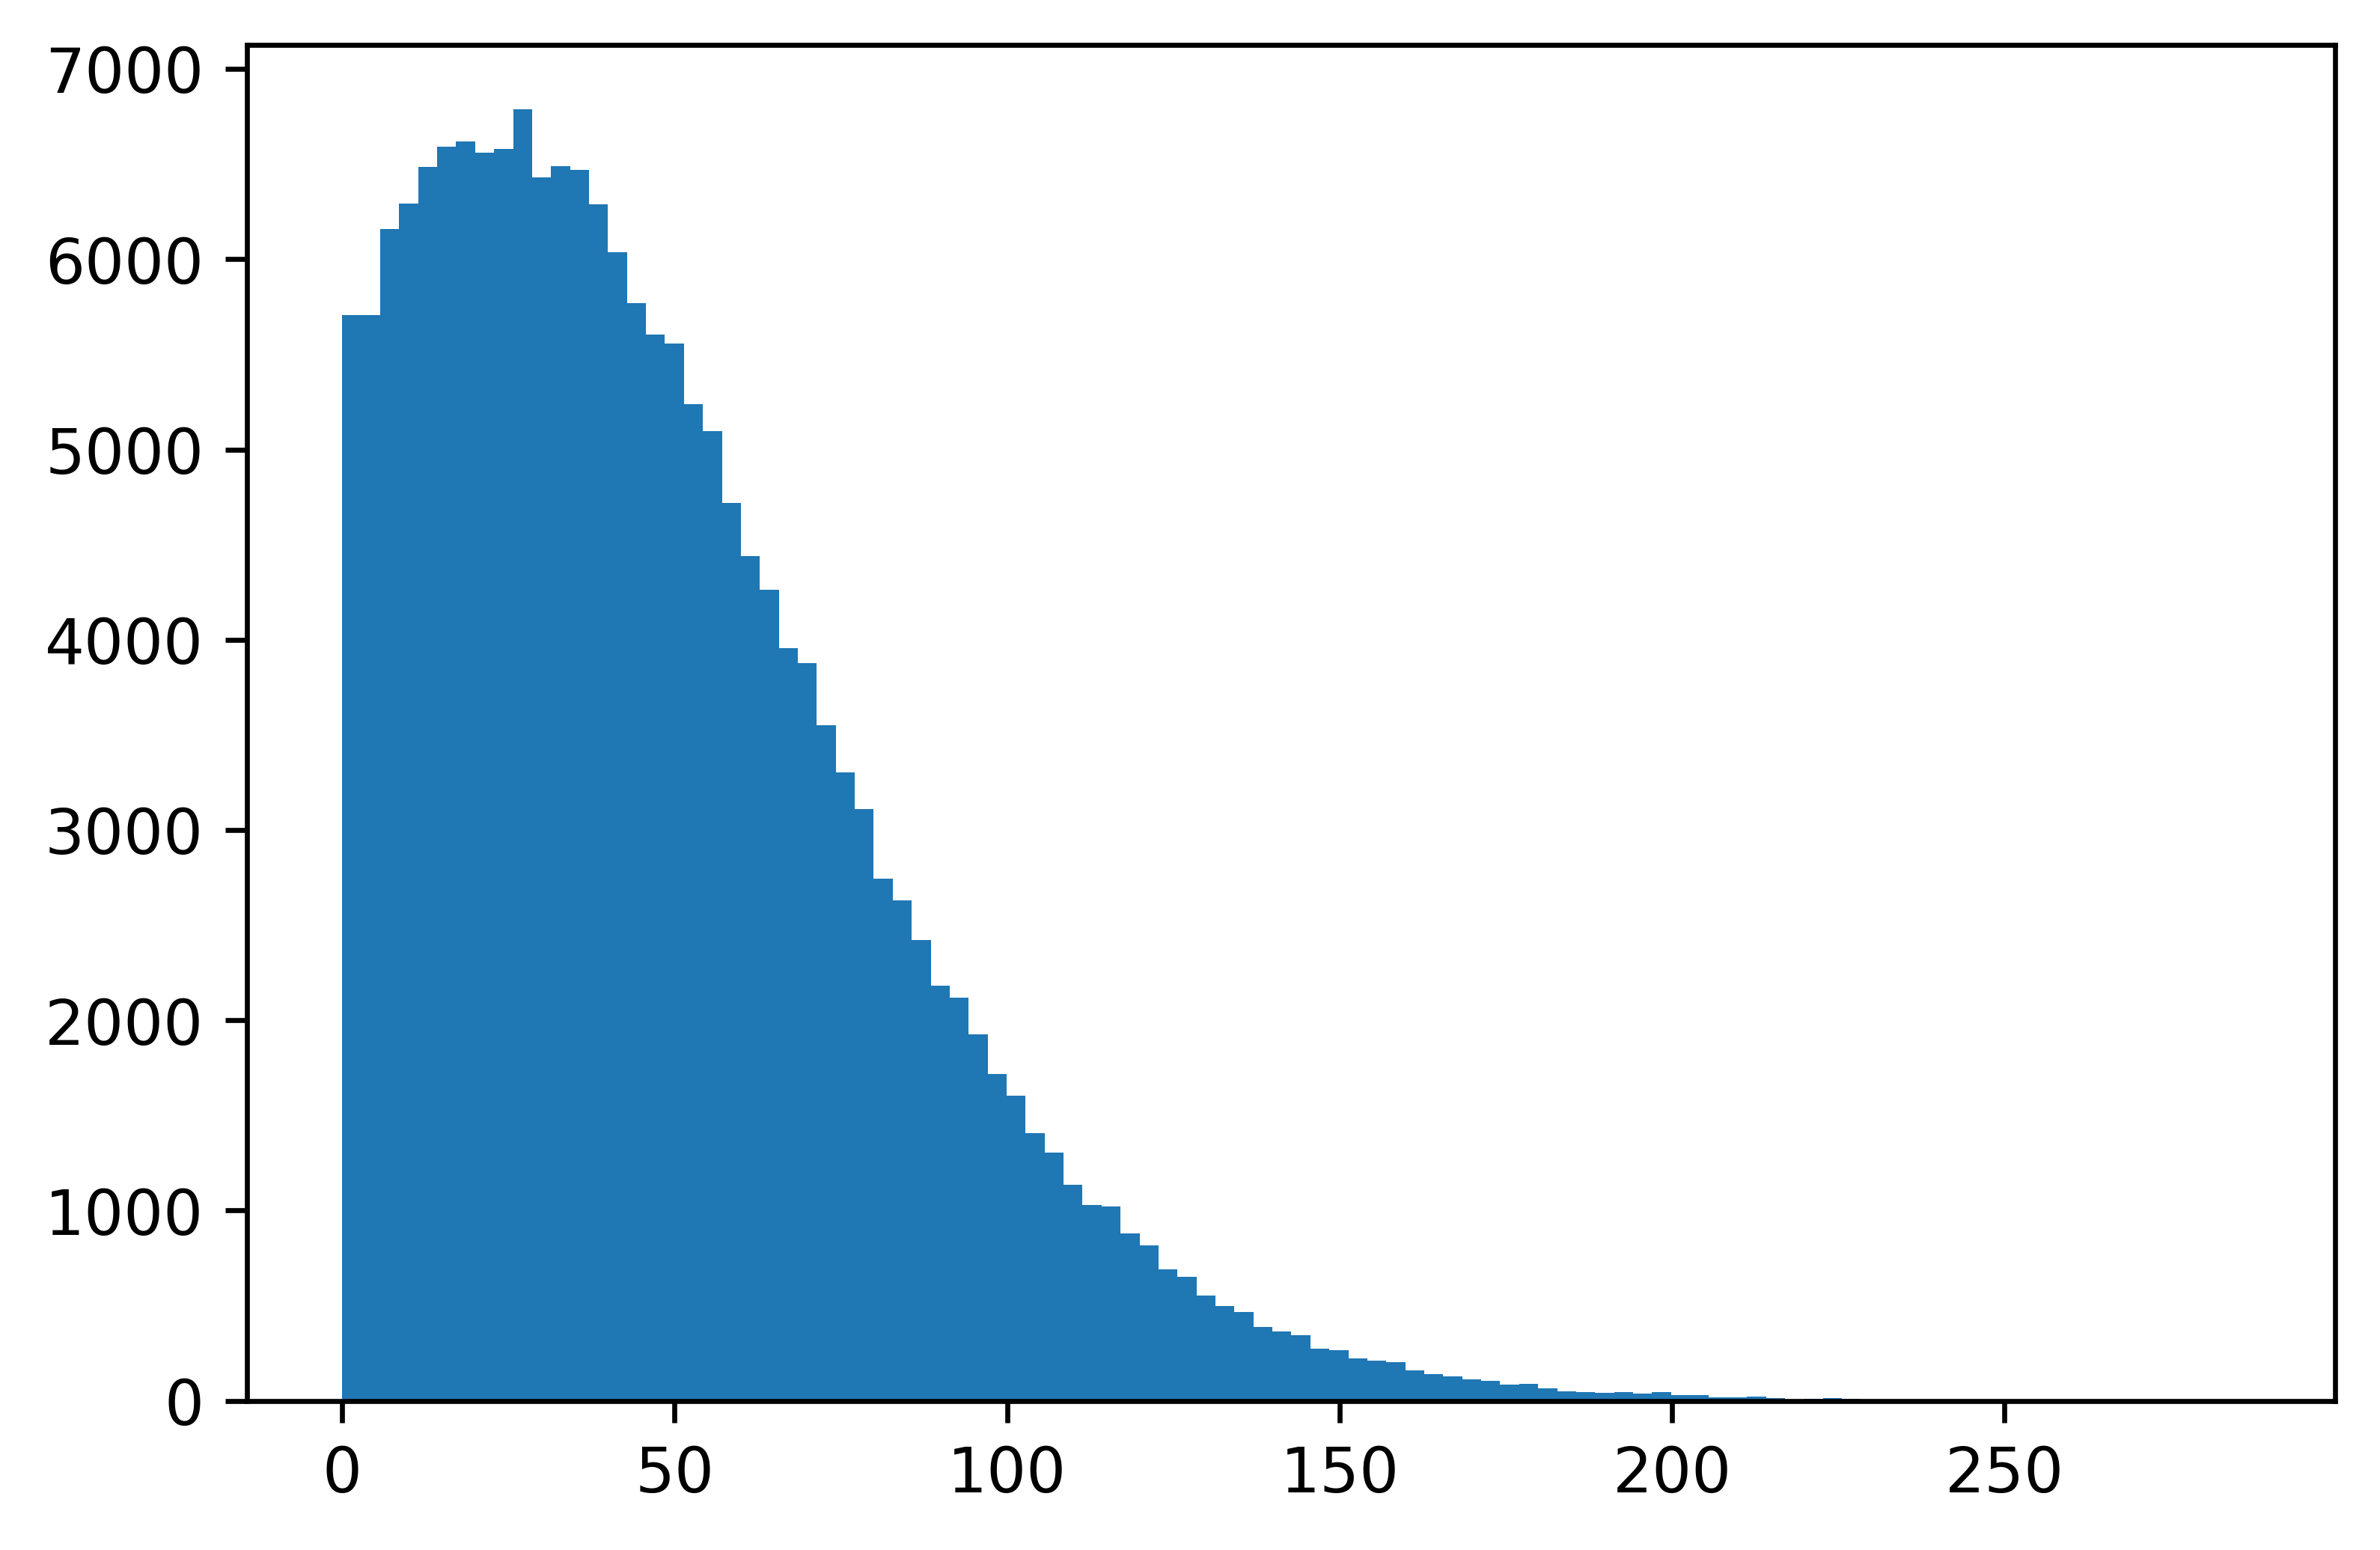

In [11]:
fig = plt.figure('max_convol', dpi = 600)
ax = fig.add_subplot(111)
ax.hist(max_convol, bins=100)

In [13]:
print([min(max_convol), np.mean(max_convol), max(max_convol)])
imax = np.argmax(max_convol)
imin = np.argmin(max_convol)
print([imin, imax])

In [20]:
print(LGN_k[0, imin], LGN_k[1, imin])

26.915482 -18.595972


(array([1.3400e+02, 4.1930e+03, 3.6714e+04, 8.2235e+04, 2.6120e+04,
        2.1692e+04, 1.0657e+04, 2.9250e+03, 4.2700e+02, 3.6000e+01]),
 array([-101.98281  ,  -76.76004  ,  -51.53727  ,  -26.314497 ,
          -1.0917251,   24.131046 ,   49.353817 ,   74.57659  ,
          99.79936  ,  125.02213  ,  150.2449   ], dtype=float32),
 <a list of 10 Patch objects>)

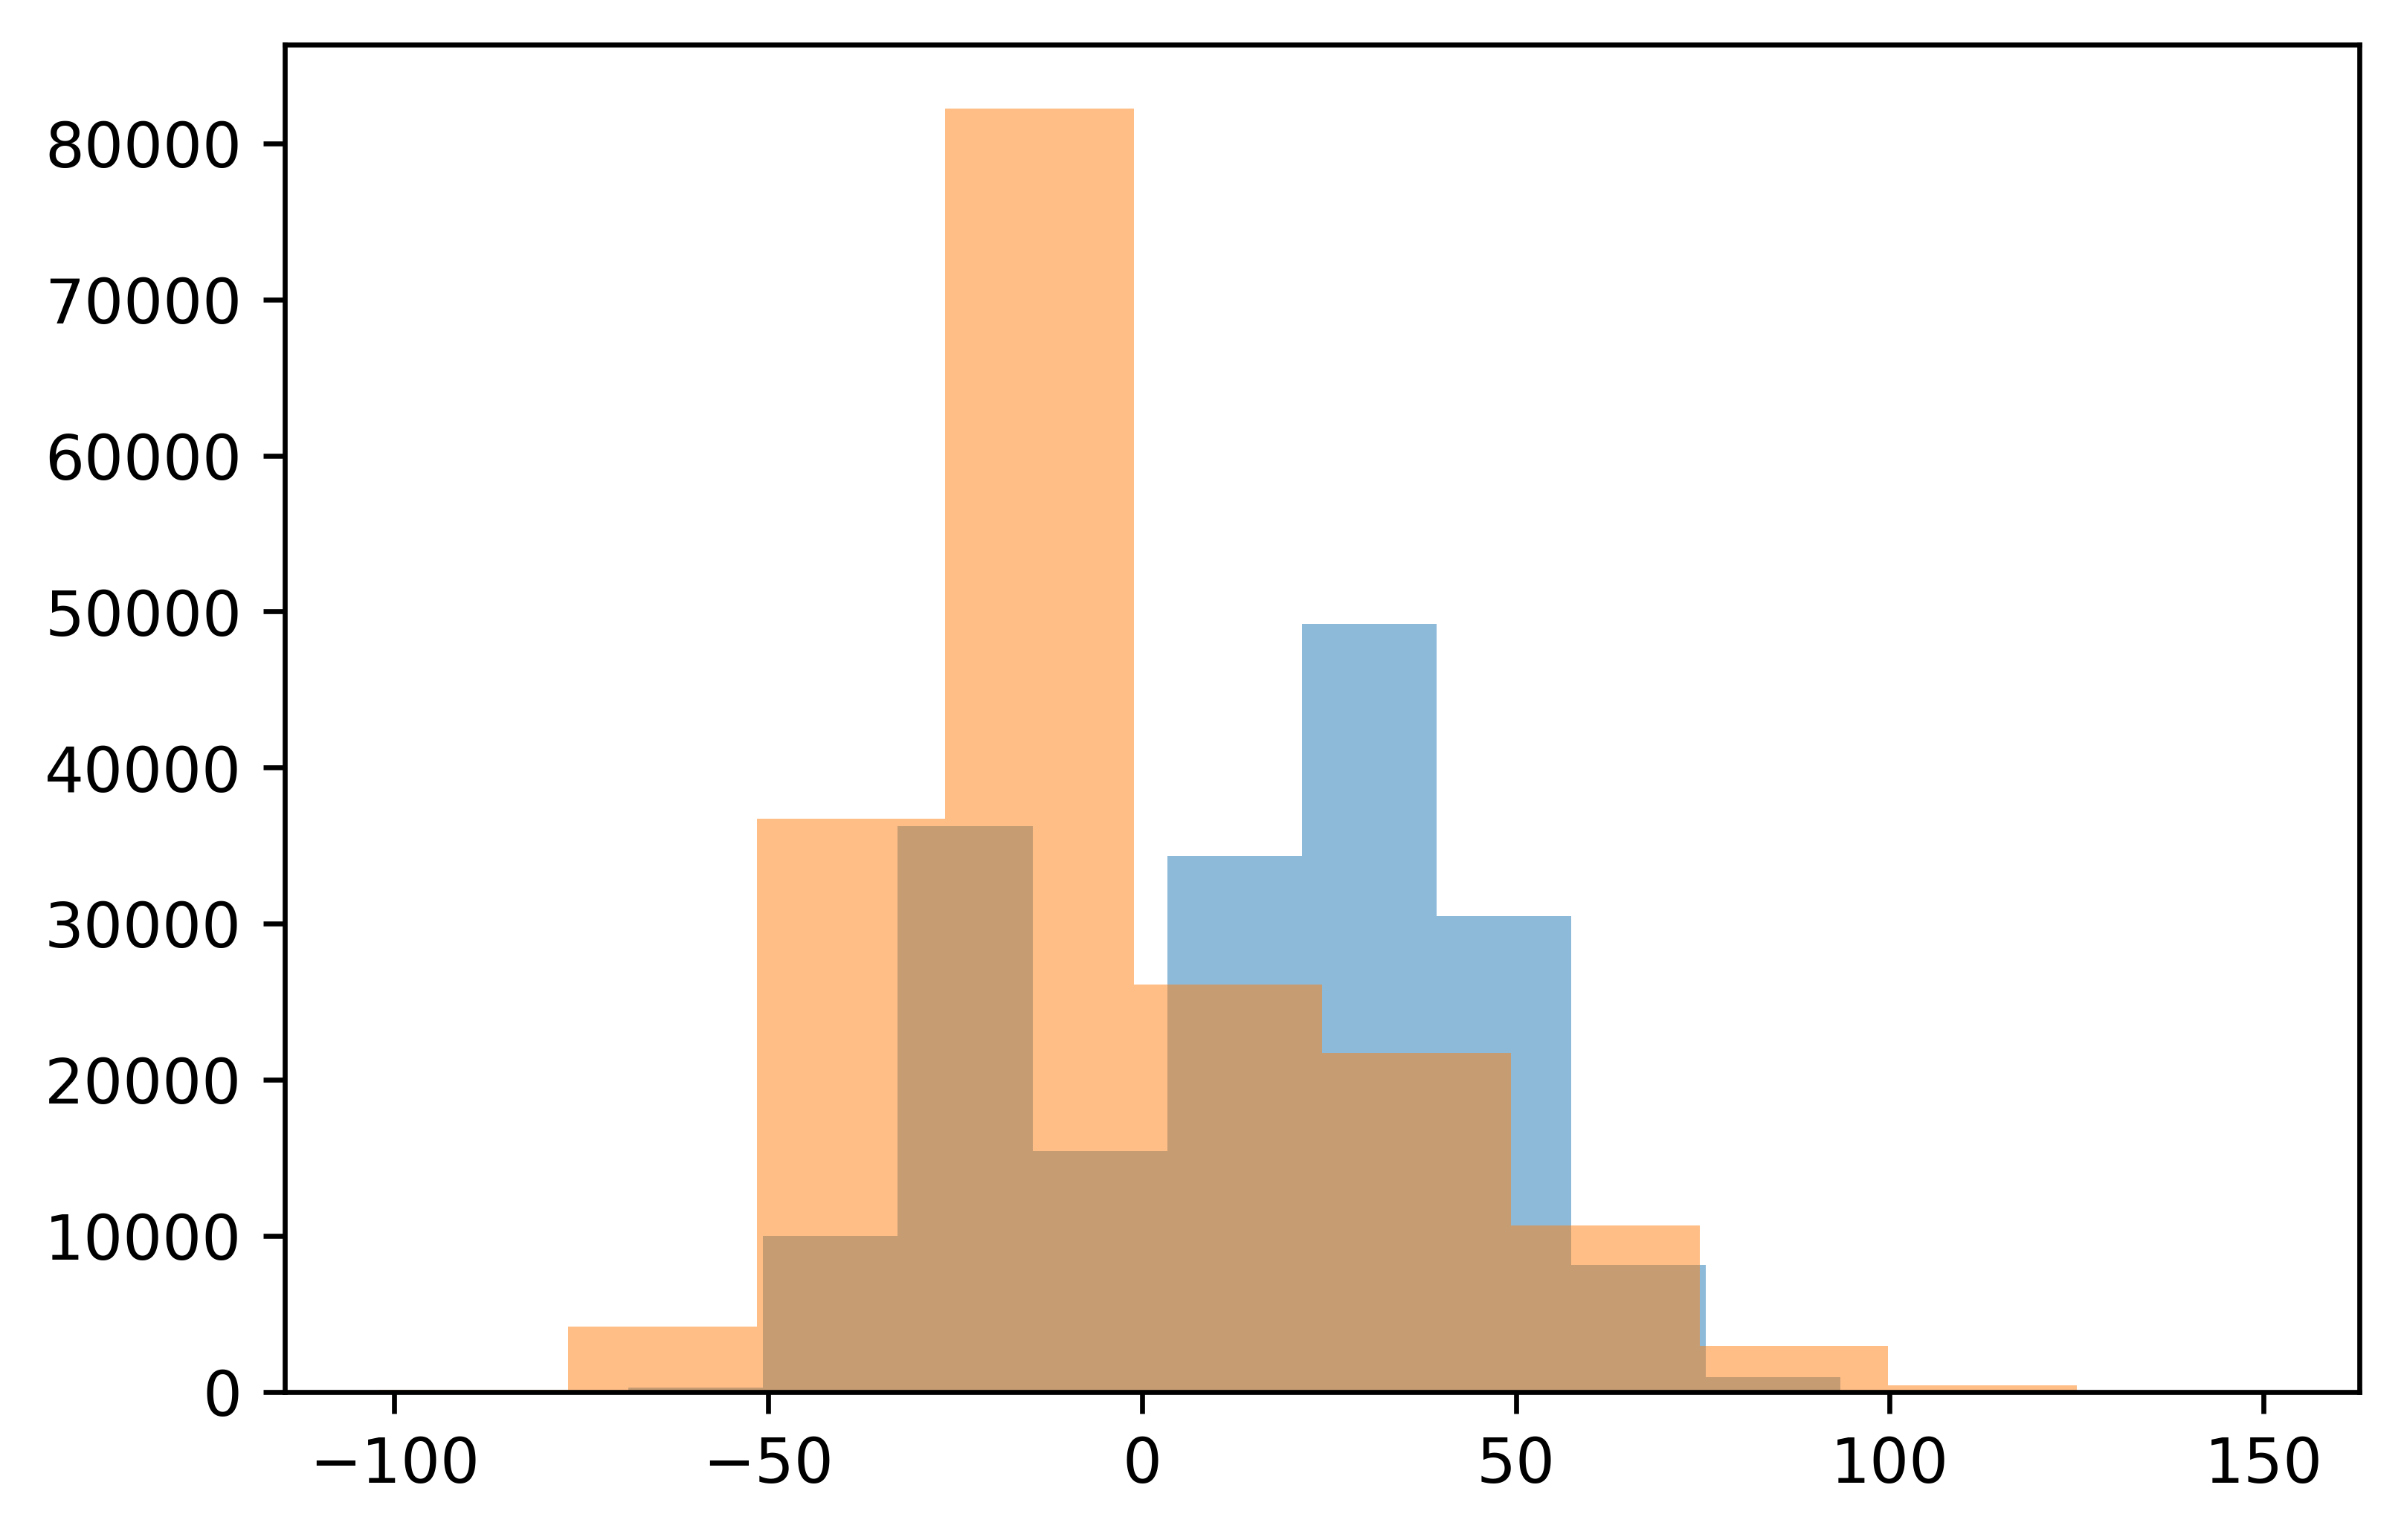

In [22]:
fig = plt.figure('hist', dpi = 600)
ax = fig.add_subplot(111)
#ax.hist(nR, bin = 100,alpha = 0.5)
#ax.hist(delay, bin =100, alpha = 0.5)
ax.hist(LGN_k[0,:], alpha = 0.5)
ax.hist(LGN_k[1,:], alpha = 0.5)

In [11]:
dalma = True
if dalma:
    output = "C:/Users/gueux/source/repos/patchV11/x64/Debug/LGN_fr.bin"
else:
    output = "LGN_fr.bin"
with open(output, 'rb') as f:
    nt = np.fromfile(f, 'u4', 1)[0]
    nLGN = np.fromfile(f, 'u4', 1)[0]
    LGN_fr = np.fromfile(f, precision, nLGN*nt).reshape((nt,nLGN))
print(np.sum(np.isnan(LGN_fr)))
if dalma:
    output = "C:/Users/gueux/source/repos/patchV11/x64/Debug/LGN_convol.bin"
else:
    output = "LGN_convol.bin"
with open(output, 'rb') as f:
    nt = np.fromfile(f, 'u4', 1)[0]
    nLGN = np.fromfile(f, 'u4', 1)[0]
    LGN_convol = np.fromfile(f, precision, nLGN*nt).reshape((nt,nLGN))
print(np.sum(np.isnan(LGN_convol)))
if dalma:
    output = "C:/Users/gueux/source/repos/patchV11/x64/Debug/adapted_luminance.bin"
else:
    output = "adapted_luminance.bin"
with open(output, 'rb') as f:
    nt = np.fromfile(f, 'u4', 1)[0]
    nsize = np.fromfile(f, 'u4', 1)[0]
    nLGN = np.fromfile(f, 'u4', 1)[0]
    luminance = np.empty((nt,nLGN))
    #F_1 = np.empty((nt,nLGN))
    contrast = np.empty((nt,2,nLGN))
    for i in range(nt):
        luminance[i,:] = np.fromfile(f, precision, nLGN)
        #F_1[i,:] = np.fromfile(f, precision, nLGN)
        contrast[i,:,:] = np.fromfile(f, precision, 2*nLGN).reshape(2,nLGN)

0
0


(array([     0.,      0.,      0.,      0.,      0., 129716.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

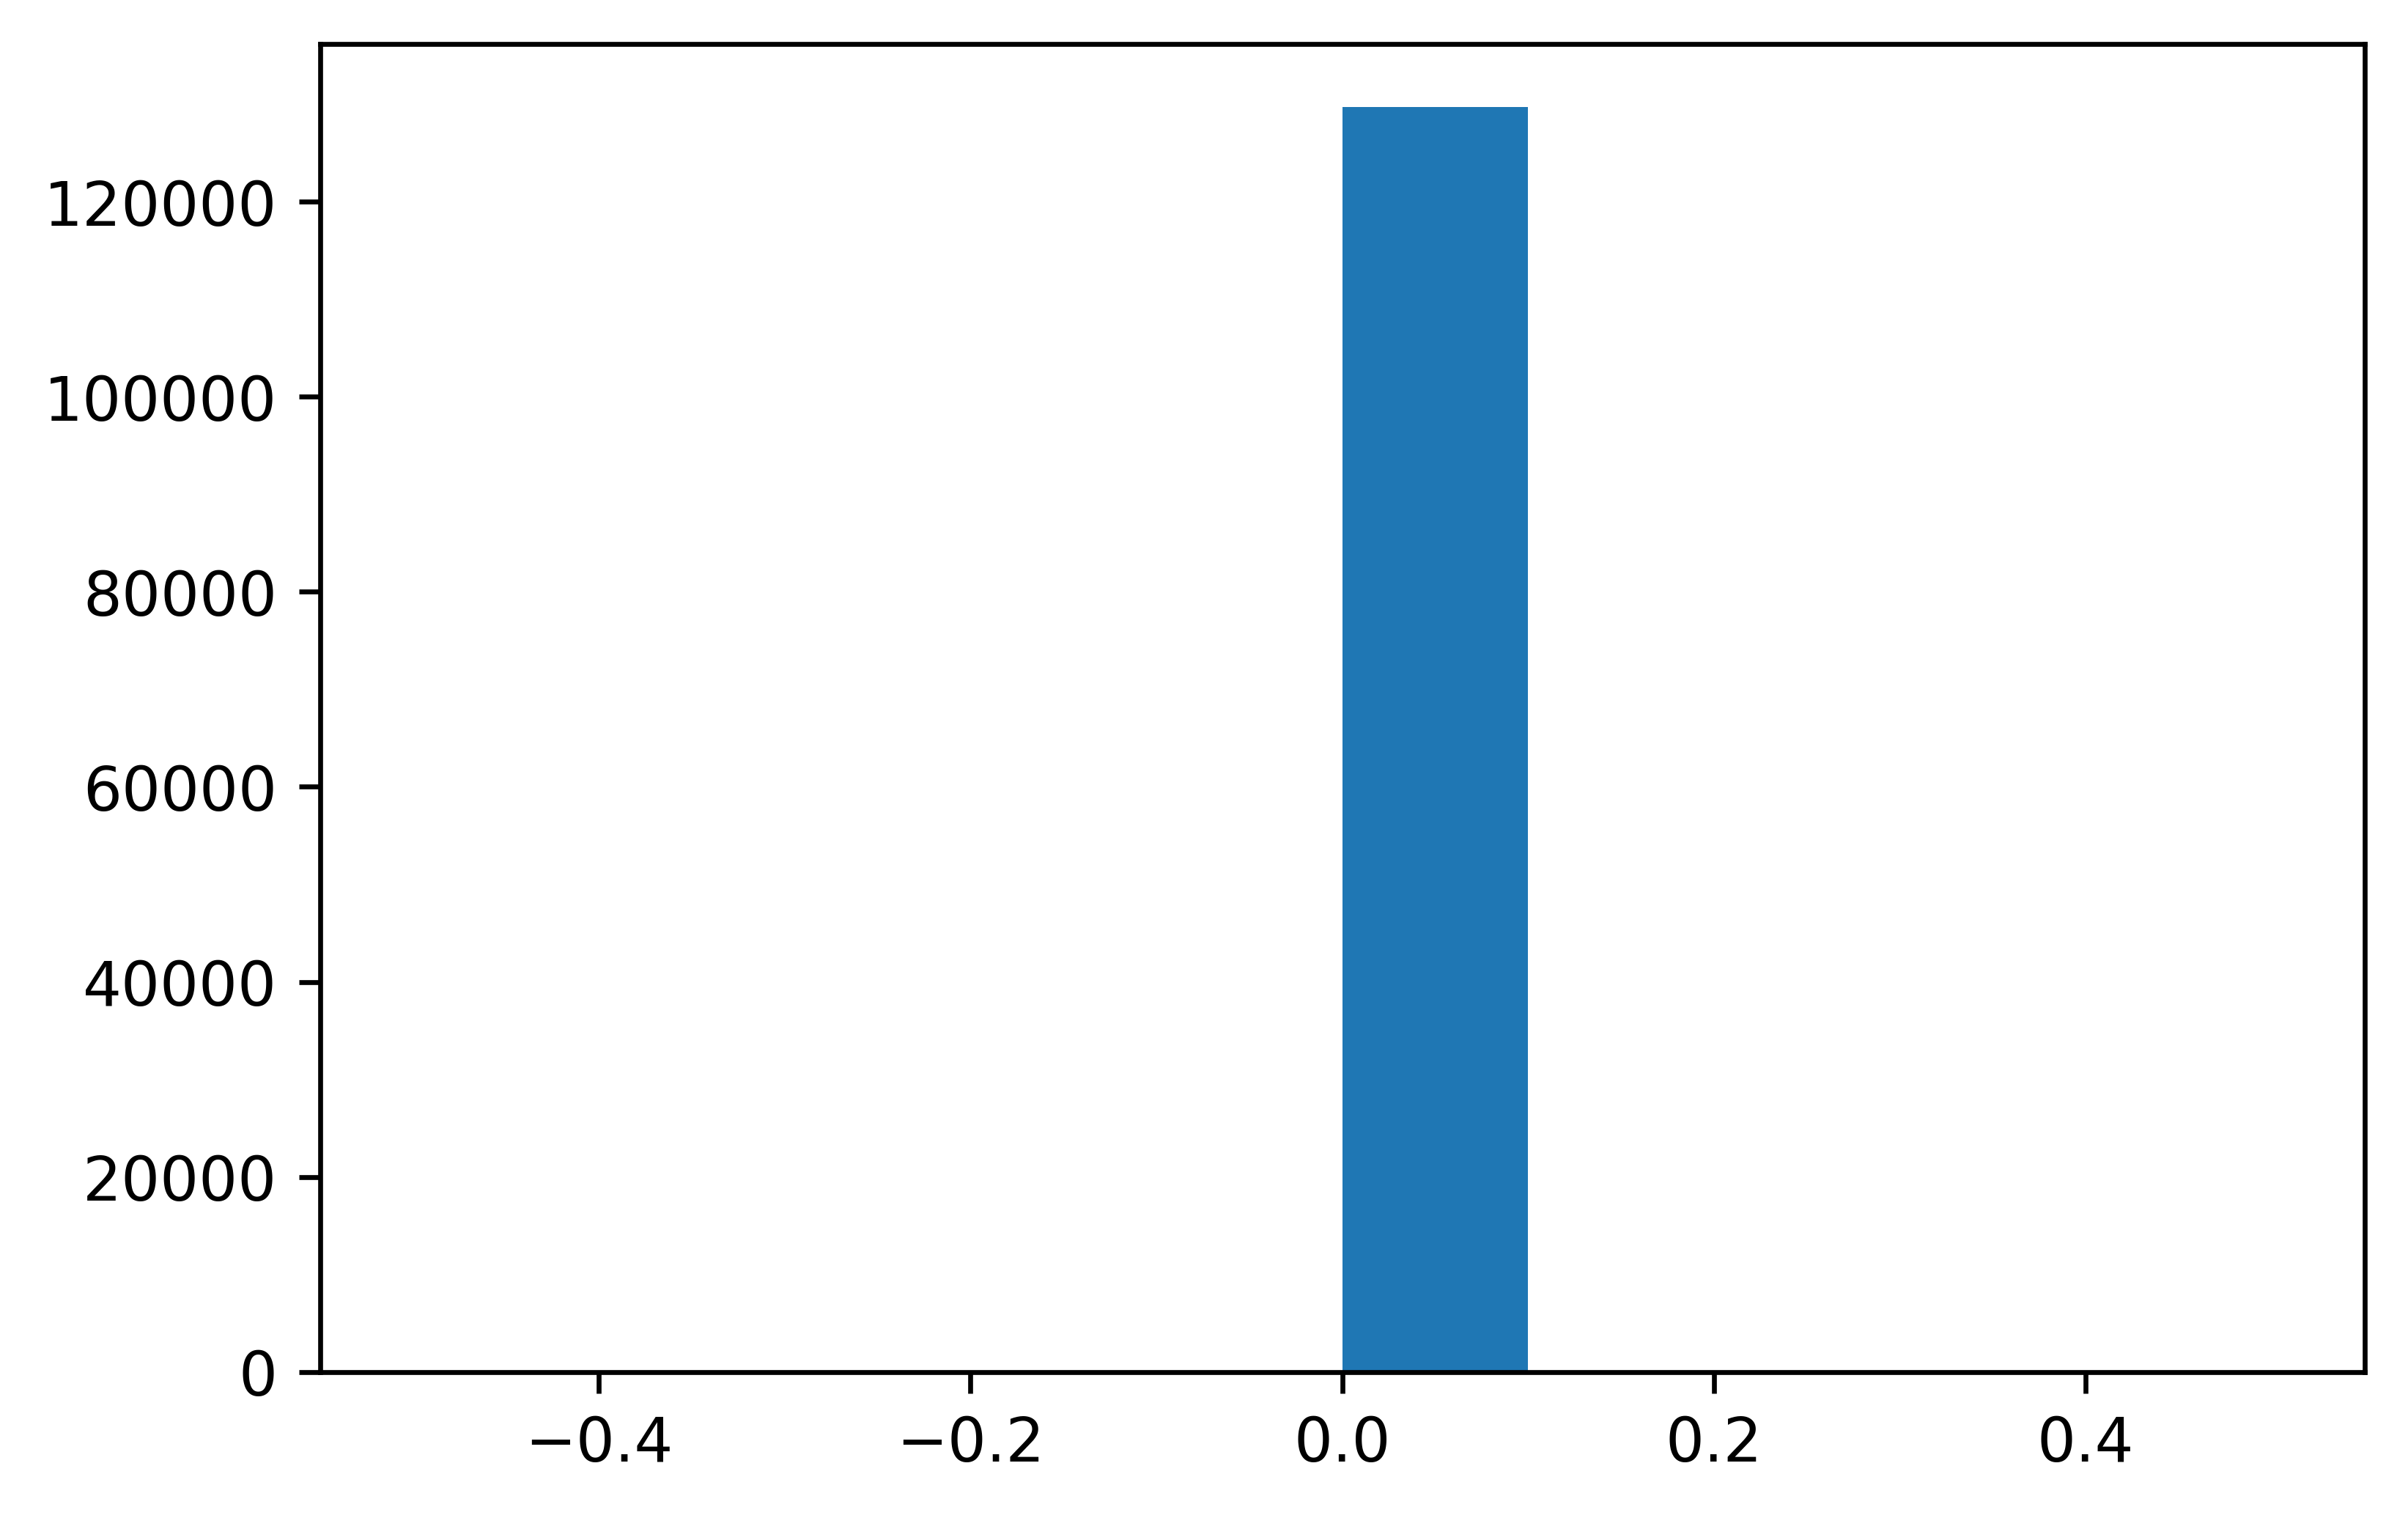

In [12]:
fig = plt.figure('contrast', dpi = 600)
ax = fig.add_subplot(111)
ax.hist(luminance[1,:])

Text(0, 0.5, 'mean luminance')

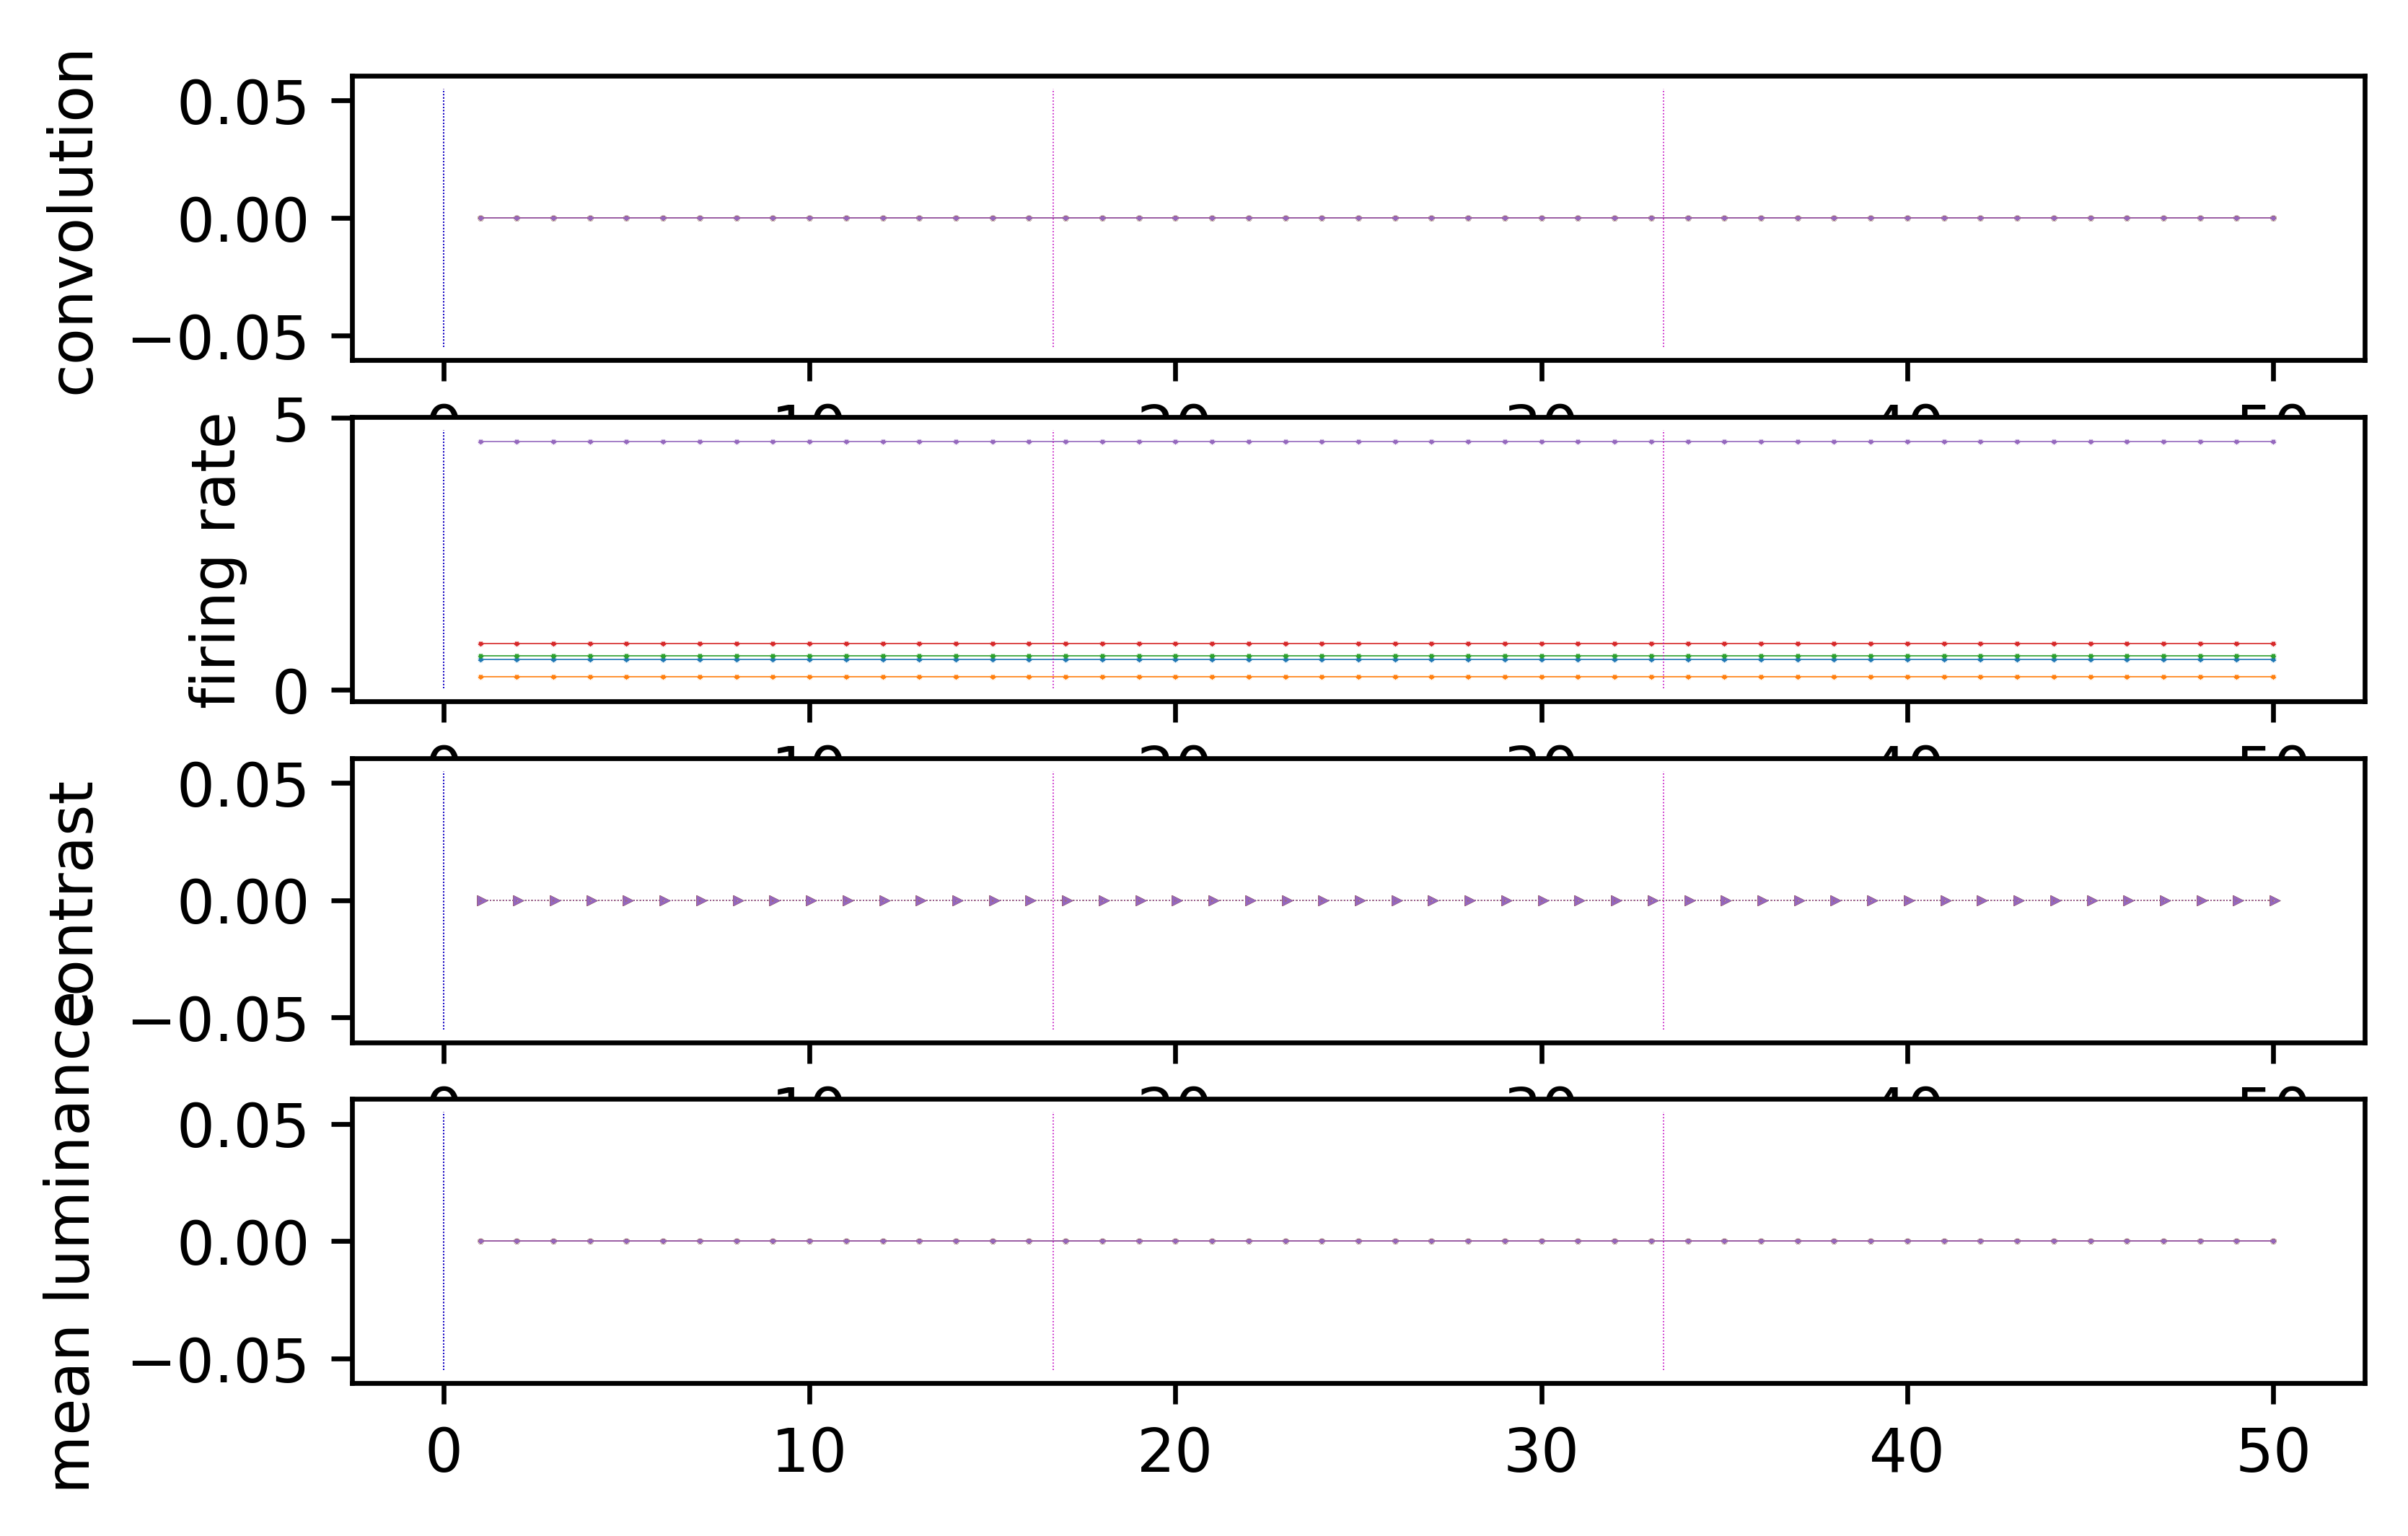

In [19]:
fig = plt.figure('fr_t', dpi = 600)
np.random.seed(120592)
sample = np.random.randint(nLGN, size = 5)
dt = 1.0
frameRate = 60
frameChangeT = np.arange(0,dt*nt, 1000/60)
ft = np.vstack((frameChangeT, frameChangeT))
t = np.linspace(0,dt*nt,nt+1)[1:]
Itau = 300.0
Itau_t = np.arange(0,dt*nt, Itau)
It = np.vstack((Itau_t, Itau_t))
tau = 250.0
tau_t = np.arange(0,dt*nt, tau)
tt = np.vstack((tau_t, tau_t))

ax = fig.add_subplot(411)
ax.plot(t, LGN_convol[:,sample], '*-', lw = 0.2, ms = 0.2)
yrange = ax.get_ylim()
y = np.array([y for y in yrange])
ax.plot(ft, y, ':m', lw = 0.2)
ax.plot(It, y, ':k', lw = 0.2) 
ax.plot(tt, y, ':b', lw = 0.2)
ax.set_ylabel('convolution')
ax = fig.add_subplot(412)
ax.plot(t, LGN_fr[:,sample], '*-', lw = 0.2, ms = 0.2)
yrange = ax.get_ylim()
y = np.array([y for y in yrange])
ax.plot(ft, y, ':m', lw = 0.2)
ax.plot(It, y, ':k', lw = 0.2) 
ax.plot(tt, y, ':b', lw = 0.2)
ax.set_ylabel('firing rate')
ax = fig.add_subplot(413)
ax.plot(t, contrast[:,0,sample], '>:', lw = 0.2, ms = 0.2)
#ax.plot(t, contrast[:,1,sample], '<-', lw = 0.2, ms = 0.2)
yrange = ax.get_ylim()
y = np.array([y for y in yrange])
ax.plot(ft, y, ':m', lw = 0.2)
ax.plot(It, y, ':k', lw = 0.2) 
ax.plot(tt, y, ':b', lw = 0.2)
ax.set_ylabel('contrast')
ax = fig.add_subplot(414)
ax.plot(t, luminance[:,sample], '*-', lw = 0.2, ms = 0.2)
yrange = ax.get_ylim()
y = np.array([y for y in yrange])
ax.plot(ft, y, ':m', lw = 0.2)
ax.plot(It, y, ':k', lw = 0.2) 
ax.plot(tt, y, ':b', lw = 0.2)
ax.set_ylabel('mean luminance')

ValueError: x and y must have same first dimension, but have shapes (3,) and (30, 5)

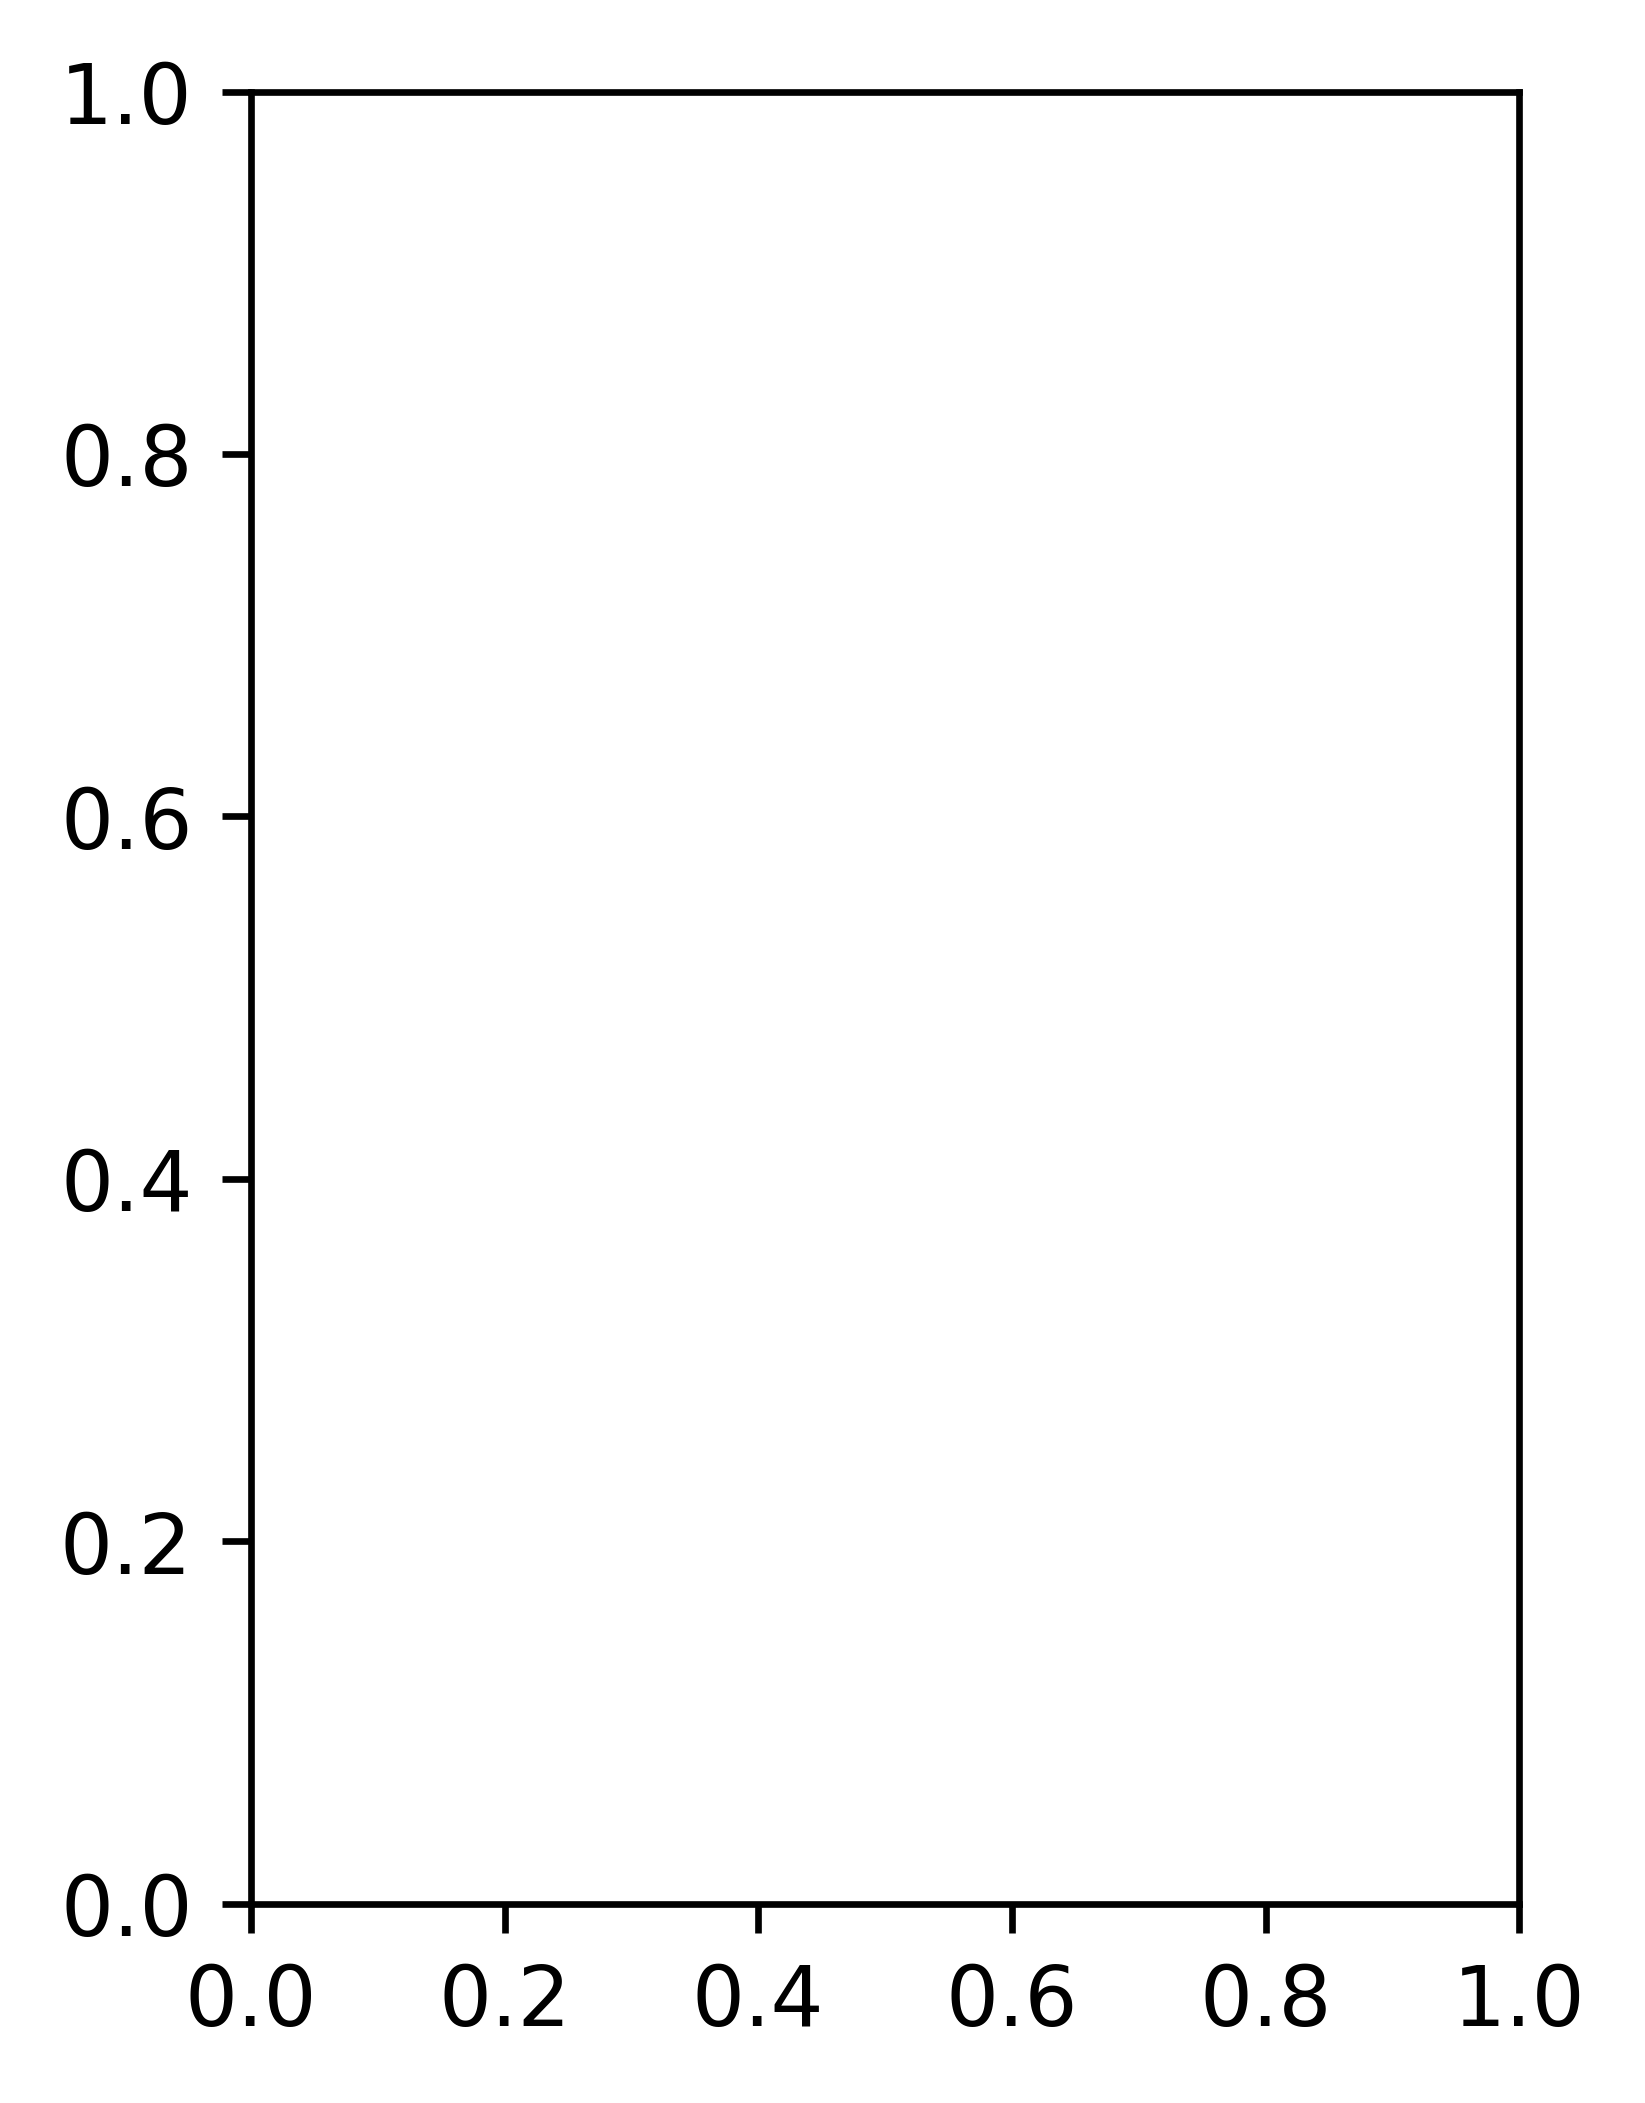

In [18]:
dpi = 600
fig = plt.figure('pixel temporal change',dpi = dpi)
ns = 5
sx = np.random.randint(256, size = ns)
sy = np.random.randint(256, size = ns)
#sx = 120
#sy = 120
ax = fig.add_subplot(121)
ax.plot(frameChangeT, LMS_series[:30,0,sx,sy],':*')
ax = fig.add_subplot(122)
ax.plot(frameChangeT, LMS_series[:30,1,sx,sy],':*')

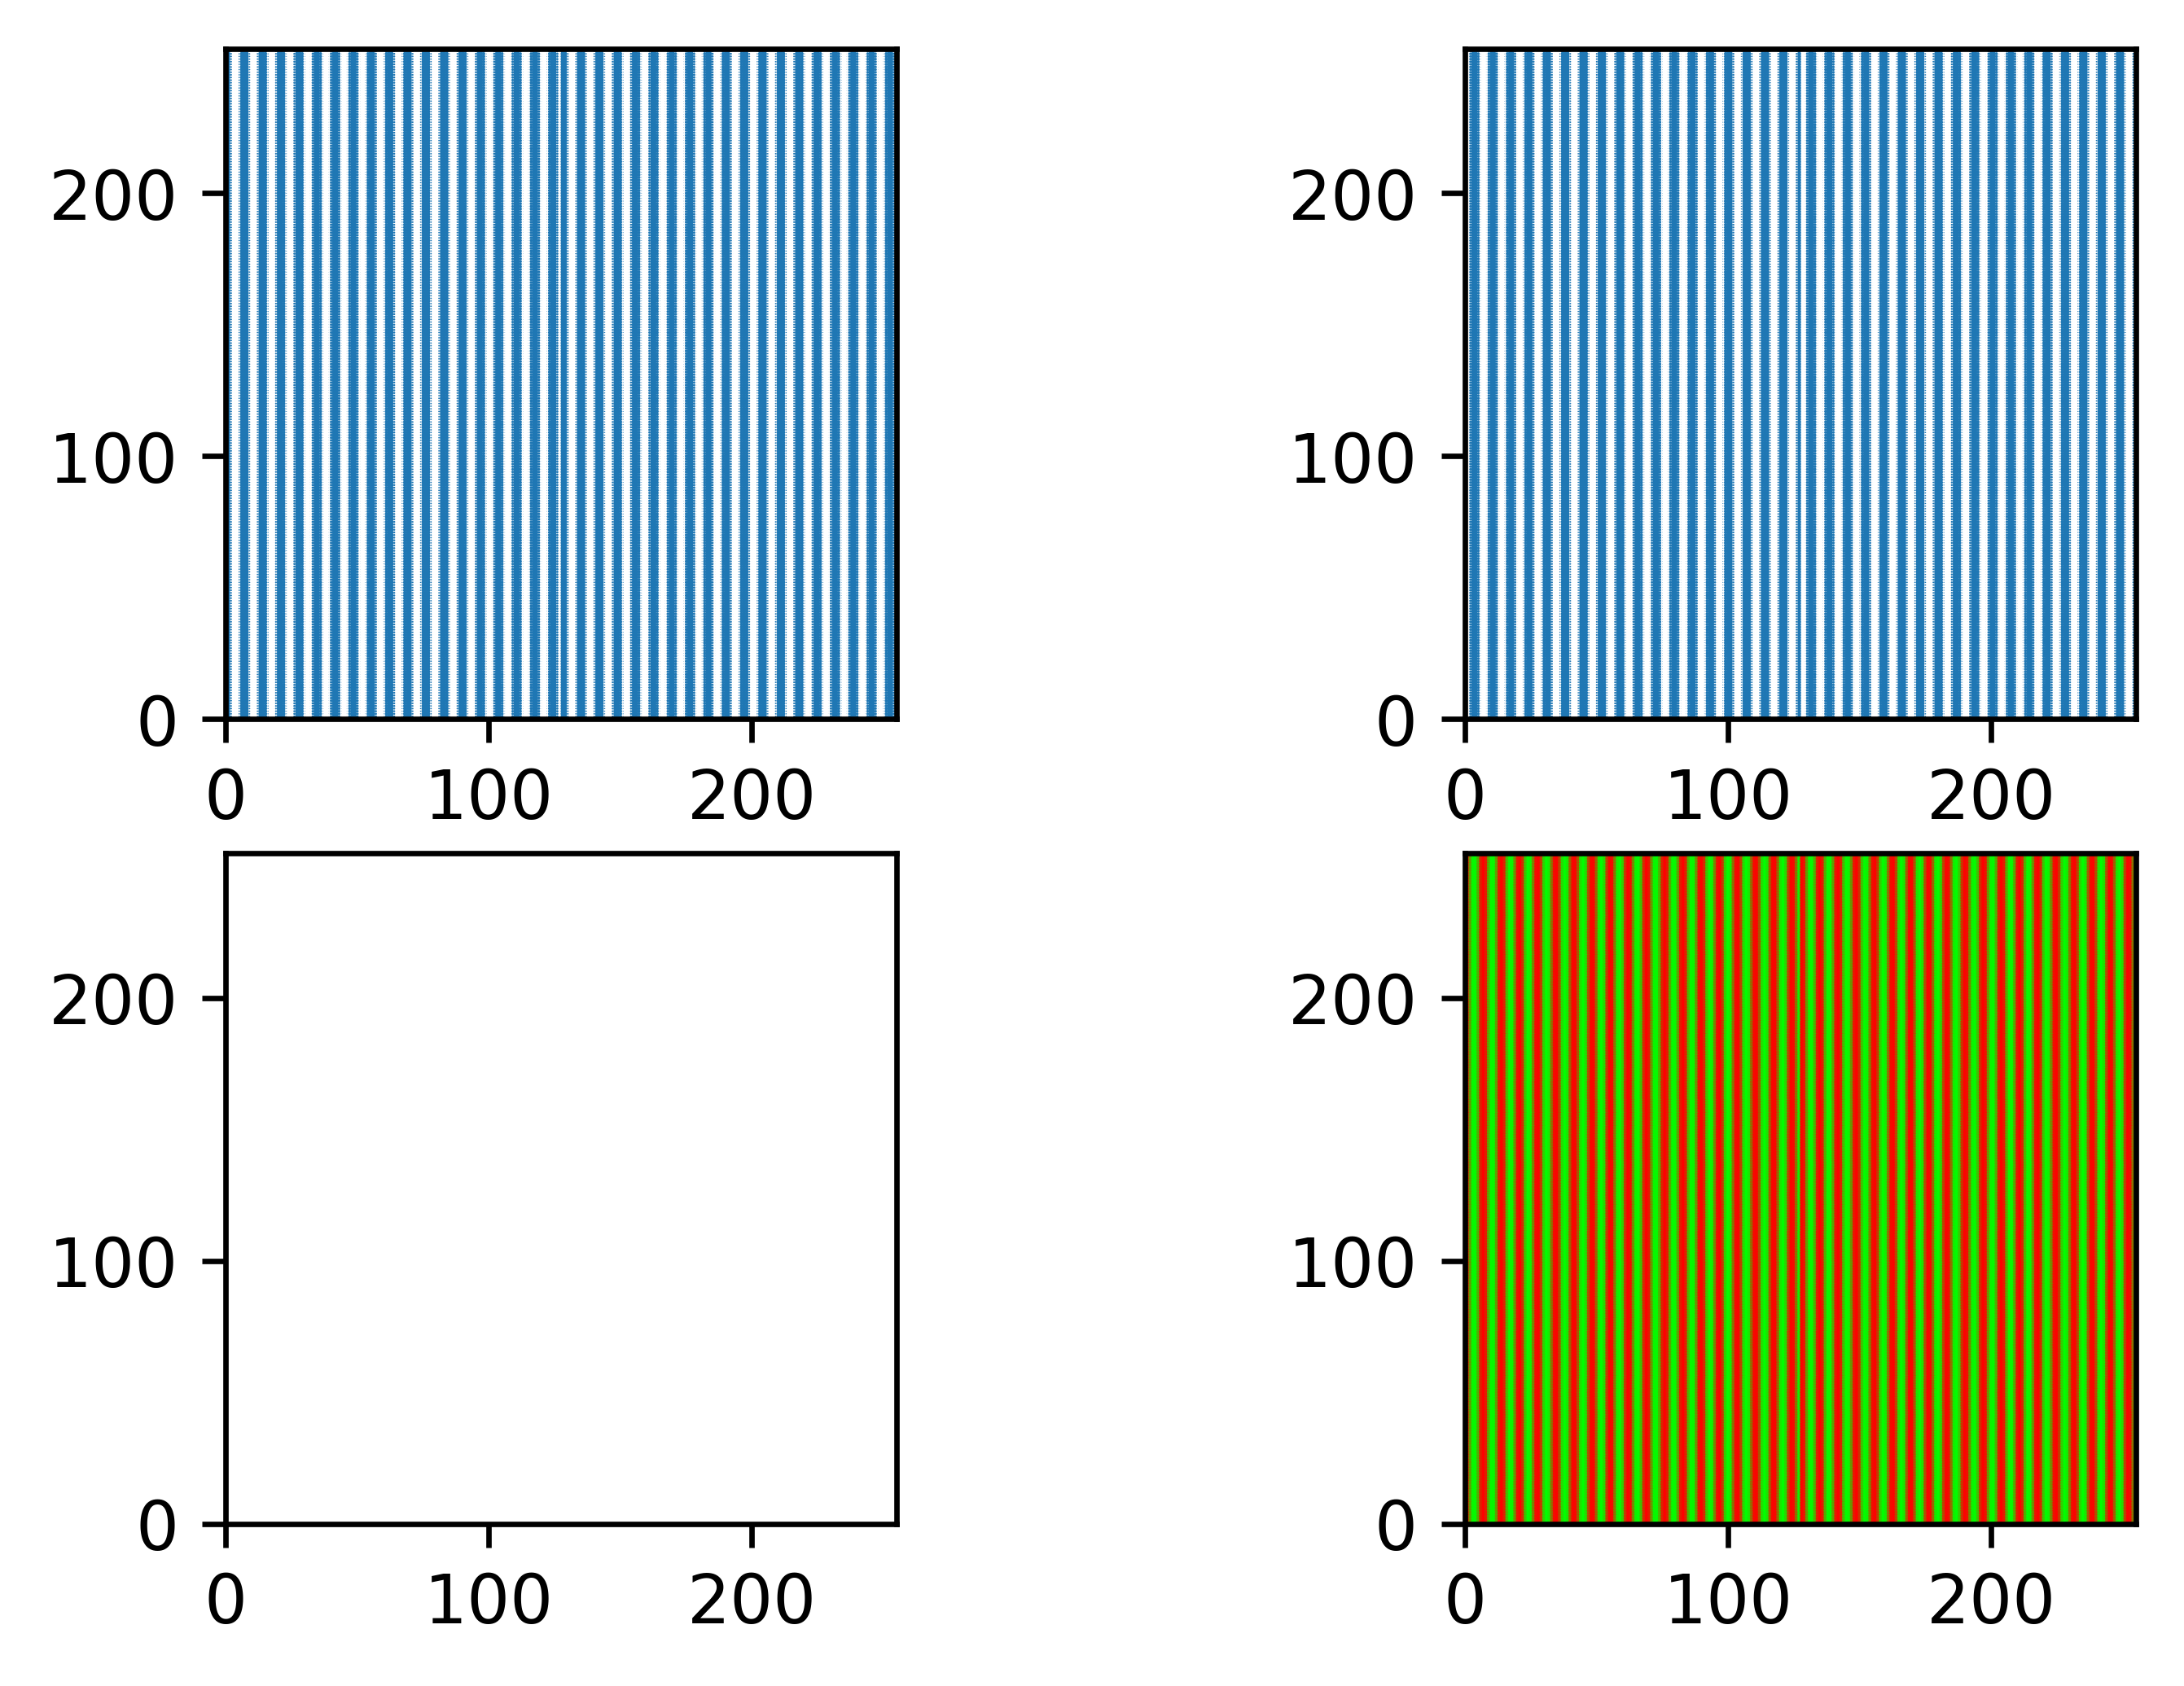

In [20]:
dpi = 600
fig = plt.figure('LMS revisit', dpi = dpi)
it = 13
xx, yy = np.meshgrid(np.arange(256), np.arange(256))
ax = fig.add_subplot(221)
ax.scatter(xx.flatten(), yy.flatten(), s = (72/dpi*10*LMS_series[it, 0, np.flipud(yy).flatten(), xx.flatten()])**2, marker='.',linewidths=0.0)
ax.set_xlim([0,255])
ax.set_ylim([0,255])
ax.set_aspect('equal')
ax = fig.add_subplot(222)
ax.scatter(xx.flatten(), yy.flatten(), s = (72/dpi*10*LMS_series[it, 1, np.flipud(yy).flatten(), xx.flatten()])**2, marker='.',linewidths=0.0)
ax.set_xlim([0,255])
ax.set_ylim([0,255])
ax.set_aspect('equal')
ax = fig.add_subplot(223)
ax.scatter(xx.flatten(), yy.flatten(), s = (72/dpi*10*LMS_series[it, 2, np.flipud(yy).flatten(), xx.flatten()])**2, marker='.',linewidths=0.0)
ax.set_xlim([0,255])
ax.set_ylim([0,255])
ax.set_aspect('equal')
ax = fig.add_subplot(224)
color = np.reshape(LMS_series[it, :, np.flipud(yy).flatten(), xx.flatten()], (xx.size, 3))
ax.scatter(xx.flatten(), yy.flatten(), s = (72/dpi*10)**2, c = color, marker='.',linewidths=0.0)
ax.set_xlim([0,255])
ax.set_ylim([0,255])
ax.set_aspect('equal')

In [159]:
print(xx[:,1])
print(yy[:,1])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 1

c50 = 0.155, slope = 2.856


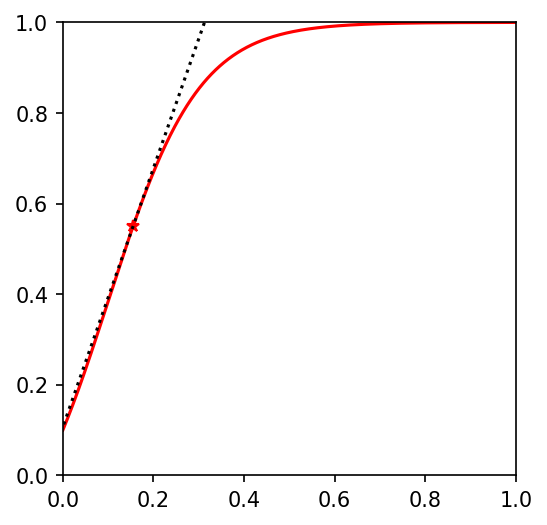

In [9]:
fig = plt.figure('logistic', dpi = 150)
x = np.linspace(0,1,1000)

def logistic0(k, spont, c50, x):
    e_kc50 = np.exp(k*c50)
    e_kc50_k = np.exp(k*(c50-1))
    a = (1-spont)*(1+e_kc50)*(1+e_kc50_k)/(e_kc50-e_kc50_k)
    b = 1 - a/(1+e_kc50_k)
    return a/(1+np.exp(-k*x)*e_kc50) + b

#NOTE: c50 is only a translational paramter in logistic function, the return value of logistic_c50 is the true c50
def logistic_c50(k,c50):
    x = 1+np.exp(k*c50)
    y = 1+np.exp(k*c50-k)
    A = 2*x*y/(x+y)-1
    return c50 - np.log(A)/k

def logistic_slope(k, spont, c50, x):
    e_kc50 = np.exp(k*c50)
    e_kc50_k = np.exp(k*(c50-1))
    a = (1-spont)*(1+e_kc50)*(1+e_kc50_k)/(e_kc50-e_kc50_k)
    return a*k*np.exp(-k*x)*e_kc50/np.power(1+np.exp(-k*x)*e_kc50,2)

intercept = 0.1
translation = 0.1
k = 10

y = logistic0(k, intercept, translation, x)
ax = fig.add_subplot(111)
ax.plot(x, y,'r')
c50 = logistic_c50(k,translation)
y_c50 = (intercept+1)/2
slope = logistic_slope(k,intercept,translation,c50)
print(f'c50 = {c50:.3f}, slope = {slope:.3f}')
ax.plot(c50, y_c50,'*r')

ax.plot([c50-1, c50, c50+1], [y_c50-slope,y_c50,y_c50+slope],':k')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')

In [14]:
def cone_isolating(l,m,s,n,wp):
    fig = plt.figure('logistic', dpi = 100)
    ax = fig.add_subplot(111)
    l = np.reshape(l,(n,1))
    m = np.reshape(m,(n,1))
    s = np.reshape(s,(n,1))
    lms = np.concatenate([l,m,s],1)
    rgb = np.matmul(LMS2sRGB,lms.T)
    x = np.arange(n)
    ax.plot(x,rgb[0,:],'r')
    ax.plot(x,rgb[1,:],'g')
    ax.plot(x,rgb[2,:],'b')
    onRecord = False
    recordOn = False
    offRecord = False
    for i in range(n):
        color = rgb[:,i].astype('float').T/255
        if sum(color>=0) == 3 and sum(color<=1) == 3:
            if not offRecord:
                Off = color
                offRecord = True
            ax.plot(x[i], np.sum(luminance(color)*255),'.', c=color)
            onColor = color
        else:
            if offRecord and not onRecord:
                recordOn = True
                onRecord = True
        
        if recordOn or i == n-1:
            On = onColor
            recordOn = False
    #ax.plot(l[:-1],np.diff(rgb[2,:]),':b')
    #ax.plot(l[:-1],np.diff(rgb[1,:]),':g')
    ax.plot(np.zeros(255)+wp,np.arange(255),':r')
    ax.plot(x,np.zeros(x.size),':k')
    ax.plot(x,np.zeros(x.size)+255,':k')
    print(f'{luminance(On)}, {luminance(Off)}')
    if onRecord and offRecord:
        return On, Off
    else:
        raise Exception('no positive values')

In [15]:
def luminance(rgb):
    return np.matmul(sRGB2XYZ[1,:],rgb.reshape((3,1)))

[[ 3.2406227  -1.5371978  -0.49868131]
 [-0.96893048  1.87575521  0.04152191]
 [ 0.05571601 -0.20404262  1.05710768]]
[ 0.37180824  0.35005428  0.28524582]
white point = [ 1.          0.94149144  0.76718532]


In [38]:
## white point from Reid and Shapley 2002
#x = 0.33
#y = 0.35

x = 0.3127
y = 0.3290
z = 1-x-y
XYZ2sRGB = np.linalg.inv(sRGB2XYZ)
print(f'{XYZ2sRGB}')
rgb_in_Y = np.matmul(XYZ2sRGB, np.array([x,y,z]).T)
print(f'{rgb_in_Y}')
Y = 1
wp = rgb_in_Y*Y/y
wp = wp/max(wp)
print(f'white point = {wp}')

[[ 3.2406227  -1.5371978  -0.49868131]
 [-0.96893048  1.87575521  0.04152191]
 [ 0.05571601 -0.20404262  1.05710768]]
[ 0.32892713  0.3290162   0.32905406]
white point = [ 0.99961427  0.99988497  1.        ]


In [55]:
cd = 100/255
lum = luminance(wp*cd)
print(f'luminance = {lum}')
RGB_wp = wp*cd
LMS_wp = np.matmul(sRGB2LMS, RGB_wp)
print(f'white point in LMS = {LMS_wp}')

luminance = [ 0.39209244]
white point in LMS = [ 0.39208326  0.39208529  0.39208179]


[ 0.43178272], [ 0.36662094]
0.2190476190476191: [  2.19047619e-01   7.07896377e-17   1.41580541e-16]
0.17968357791452697: [  1.79683578e-01   6.74874945e-05   1.91445768e-04], 


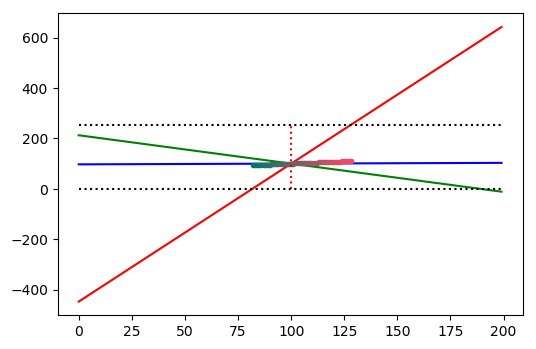

In [61]:
n = 200
l = np.reshape(np.arange(n),(n,1))
m = np.zeros(n) + LMS_wp[1]*255
s = np.zeros(n) + LMS_wp[2]*255
LOn, LOff = cone_isolating(l,m,s,n, LMS_wp[0]*255)
lms_LOn = np.matmul(sRGB2LMS, LOn.T)
lms_LOff = np.matmul(sRGB2LMS, LOff.T)
midpoint_con_rgb = np.abs(lms_LOn - lms_LOff)/(lms_LOn + lms_LOff)
wp_con_rgb = np.min(np.vstack((np.abs(lms_LOn - RGB_wp)/RGB_wp, np.abs(RGB_wp-lms_LOff)/RGB_wp)),0)
print(f'{midpoint_con_rgb[0]}: {midpoint_con_rgb}')
print(f'{wp_con_rgb[0]}: {wp_con_rgb}')

In [52]:
np.vstack((np.abs(LOn - wp)/wp, np.abs(wp-LOff)/wp))

array([[ 0.00630604,  0.73143764,  0.60455444],
       [ 0.9938836 ,  0.52852553,  0.60995368]])

[ 0.44474557], [ 0.30946937]
0.2872340425531915: [  1.41580007e-16   2.87234043e-01   7.07902703e-17]
0.210139203927158: [  1.98130781e-04   2.10139204e-01   1.91445768e-04], 


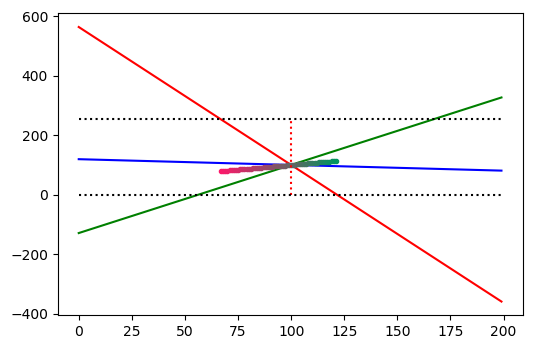

In [63]:
n = 200
m = np.reshape(np.arange(n),(n,1))
l = np.zeros((n,1)) + LMS_wp[0]*255
s = np.zeros((n,1)) + LMS_wp[2]*255
MOn, MOff = cone_isolating(l,m,s,n, LMS_wp[1]*255)
lms_LOn = np.matmul(sRGB2LMS, MOn.T)
lms_LOff = np.matmul(sRGB2LMS, MOff.T)
midpoint_con_rgb = np.abs(lms_LOn - lms_LOff)/(lms_LOn + lms_LOff)
wp_con_rgb = np.min(np.vstack((np.abs(lms_LOn - RGB_wp)/RGB_wp, np.abs(RGB_wp-lms_LOff)/RGB_wp)),0)
print(f'{midpoint_con_rgb[1]}: {midpoint_con_rgb}')
print(f'{wp_con_rgb[1]}: {wp_con_rgb}')

[ 0.39208872], [ 0.39209482]
0.8790322580645161: [  7.07900035e-17   7.07896377e-17   8.79032258e-01]
0.85: [  1.98130781e-04   6.74874945e-05   8.50000000e-01]


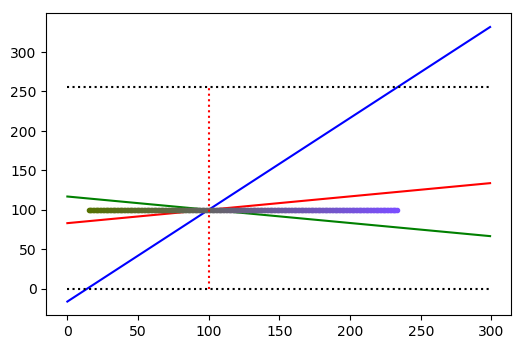

In [65]:
n = 300
s = np.reshape(np.arange(n),(n,1))
l = np.zeros((n,1)) + LMS_wp[0]*255
m = np.zeros((n,1)) + LMS_wp[1]*255
SOn, SOff = cone_isolating(l,m,s,n,LMS_wp[2]*255)
lms_LOn = np.matmul(sRGB2LMS, SOn.T)
lms_LOff = np.matmul(sRGB2LMS, SOff.T)
midpoint_con_rgb = np.abs(lms_LOn - lms_LOff)/(lms_LOn + lms_LOff)
wp_con_rgb = np.min(np.vstack((np.abs(lms_LOn - RGB_wp)/RGB_wp, np.abs(RGB_wp-lms_LOff)/RGB_wp)),0)
print(f'{midpoint_con_rgb[2]}: {midpoint_con_rgb}')
print(f'{wp_con_rgb[2]}: {wp_con_rgb}')

[ 1.          0.94149144  0.76718532],[ 0.99961427  0.99988497  1.        ]


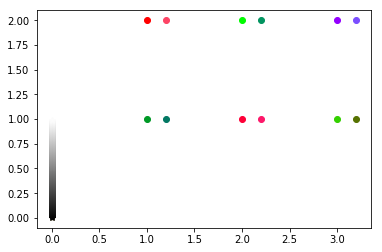

In [68]:
# white point in Reid and Shapley 2002
x = 0.33
y = 0.35
Y = 1
X = Y/y*x
Z = Y/y*(1-x-y)
XYZ = np.array([X,Y,Z])
XYZ2sRGB = np.linalg.inv(sRGB2XYZ)
color = np.matmul(XYZ2sRGB, XYZ.T)

fig = plt.figure('xyY')
ax = fig.add_subplot(111)
ax.plot(0,0, '*', c=color/max(color))
ax.plot(0.2,0, '*', c=wp)
for i in range(100):
    testcolor = np.matmul(LMS2sRGB, np.array([i/100,i/100,i/100]).T)
    ax.plot(0,i/100, '*', c=testcolor)

print(f'{color/max(color)},{wp}')

# Conway 2001
ax.plot(1,2, 'o', c=np.array([255, 0, 0])/256)
ax.plot(1,1, 'o', c=np.array([0, 154, 38])/256)

ax.plot(2,2, 'o', c=np.array([0, 252, 0])/256)
ax.plot(2,1, 'o', c=np.array([255, 0, 55])/256)

ax.plot(3,2, 'o', c=np.array([148, 0, 255])/256)
ax.plot(3,1, 'o', c=np.array([52, 209, 0])/256)

# model
ax.plot(1.2,2, 'o', c=LOn)
ax.plot(1.2,1, 'o', c=LOff)

ax.plot(2.2,2, 'o', c=MOn)
ax.plot(2.2,1, 'o', c=MOff)

ax.plot(3.2,2, 'o', c=SOn)
ax.plot(3.2,1, 'o', c=SOff)

In [328]:
sum(MOn), sum(MOff)

(1.2287486810998467, 1.7719181875105354)

In [329]:
RGB2XYZ

array([[ 2.76883088,  1.75170933,  1.13013505],
       [ 1.        ,  4.59060858,  0.06006668],
       [ 0.        ,  0.05650675,  5.5941685 ]])

In [330]:
from ext_signal import *

BGR2LMS = [[ 0.04166049  3.84105019  1.76802108]
 [ 0.07099193  5.03258835  0.54709498]
 [ 5.5941685   0.05650675  0.        ]]


In [331]:
img_to_LMS('bVHea.png')

In [31]:
def one_unknown_second_order_equation_solver(a,b,c):
    delta = b**2-4*a*c
    if delta == 0:
        return np.array([-b/2/a])
    else:
        if delta < 0:
            sqrt_delta = 1j*np.sqrt(-delta)
        else:
            sqrt_delta = np.sqrt(delta)
    return np.array([(-b-sqrt_delta)/2/a, (-b+sqrt_delta)/2/a])

def var_triag_dist(a,b,c): 
    return (a**2 + b**2 + c**2 - a*b - b*c -a*c)/18 

# guess and fix
def GAF_triag_dist(a0, b0, m, sd0):
    c0 = 3*m-a0-b0
    var = var_triag_dist(a0, b0, c0)
    p1 = 1
    p2 = -(a0+b0)
    p3 = a0*b0-6*(sd0**2-var)
    b = one_unknown_second_order_equation_solver(p1,p2,p3)[1]
    a = a0+b0-b
    c = c0
    return a, c, b

In [29]:
m = 63.68
sd0 = 33.06
a0 = 19.41
b0 = 128.10
a, c, b = GAF_triag_dist(a0, b0, m, sd0)
print(a, c, b)

-5.32258674239 43.53 152.832586742


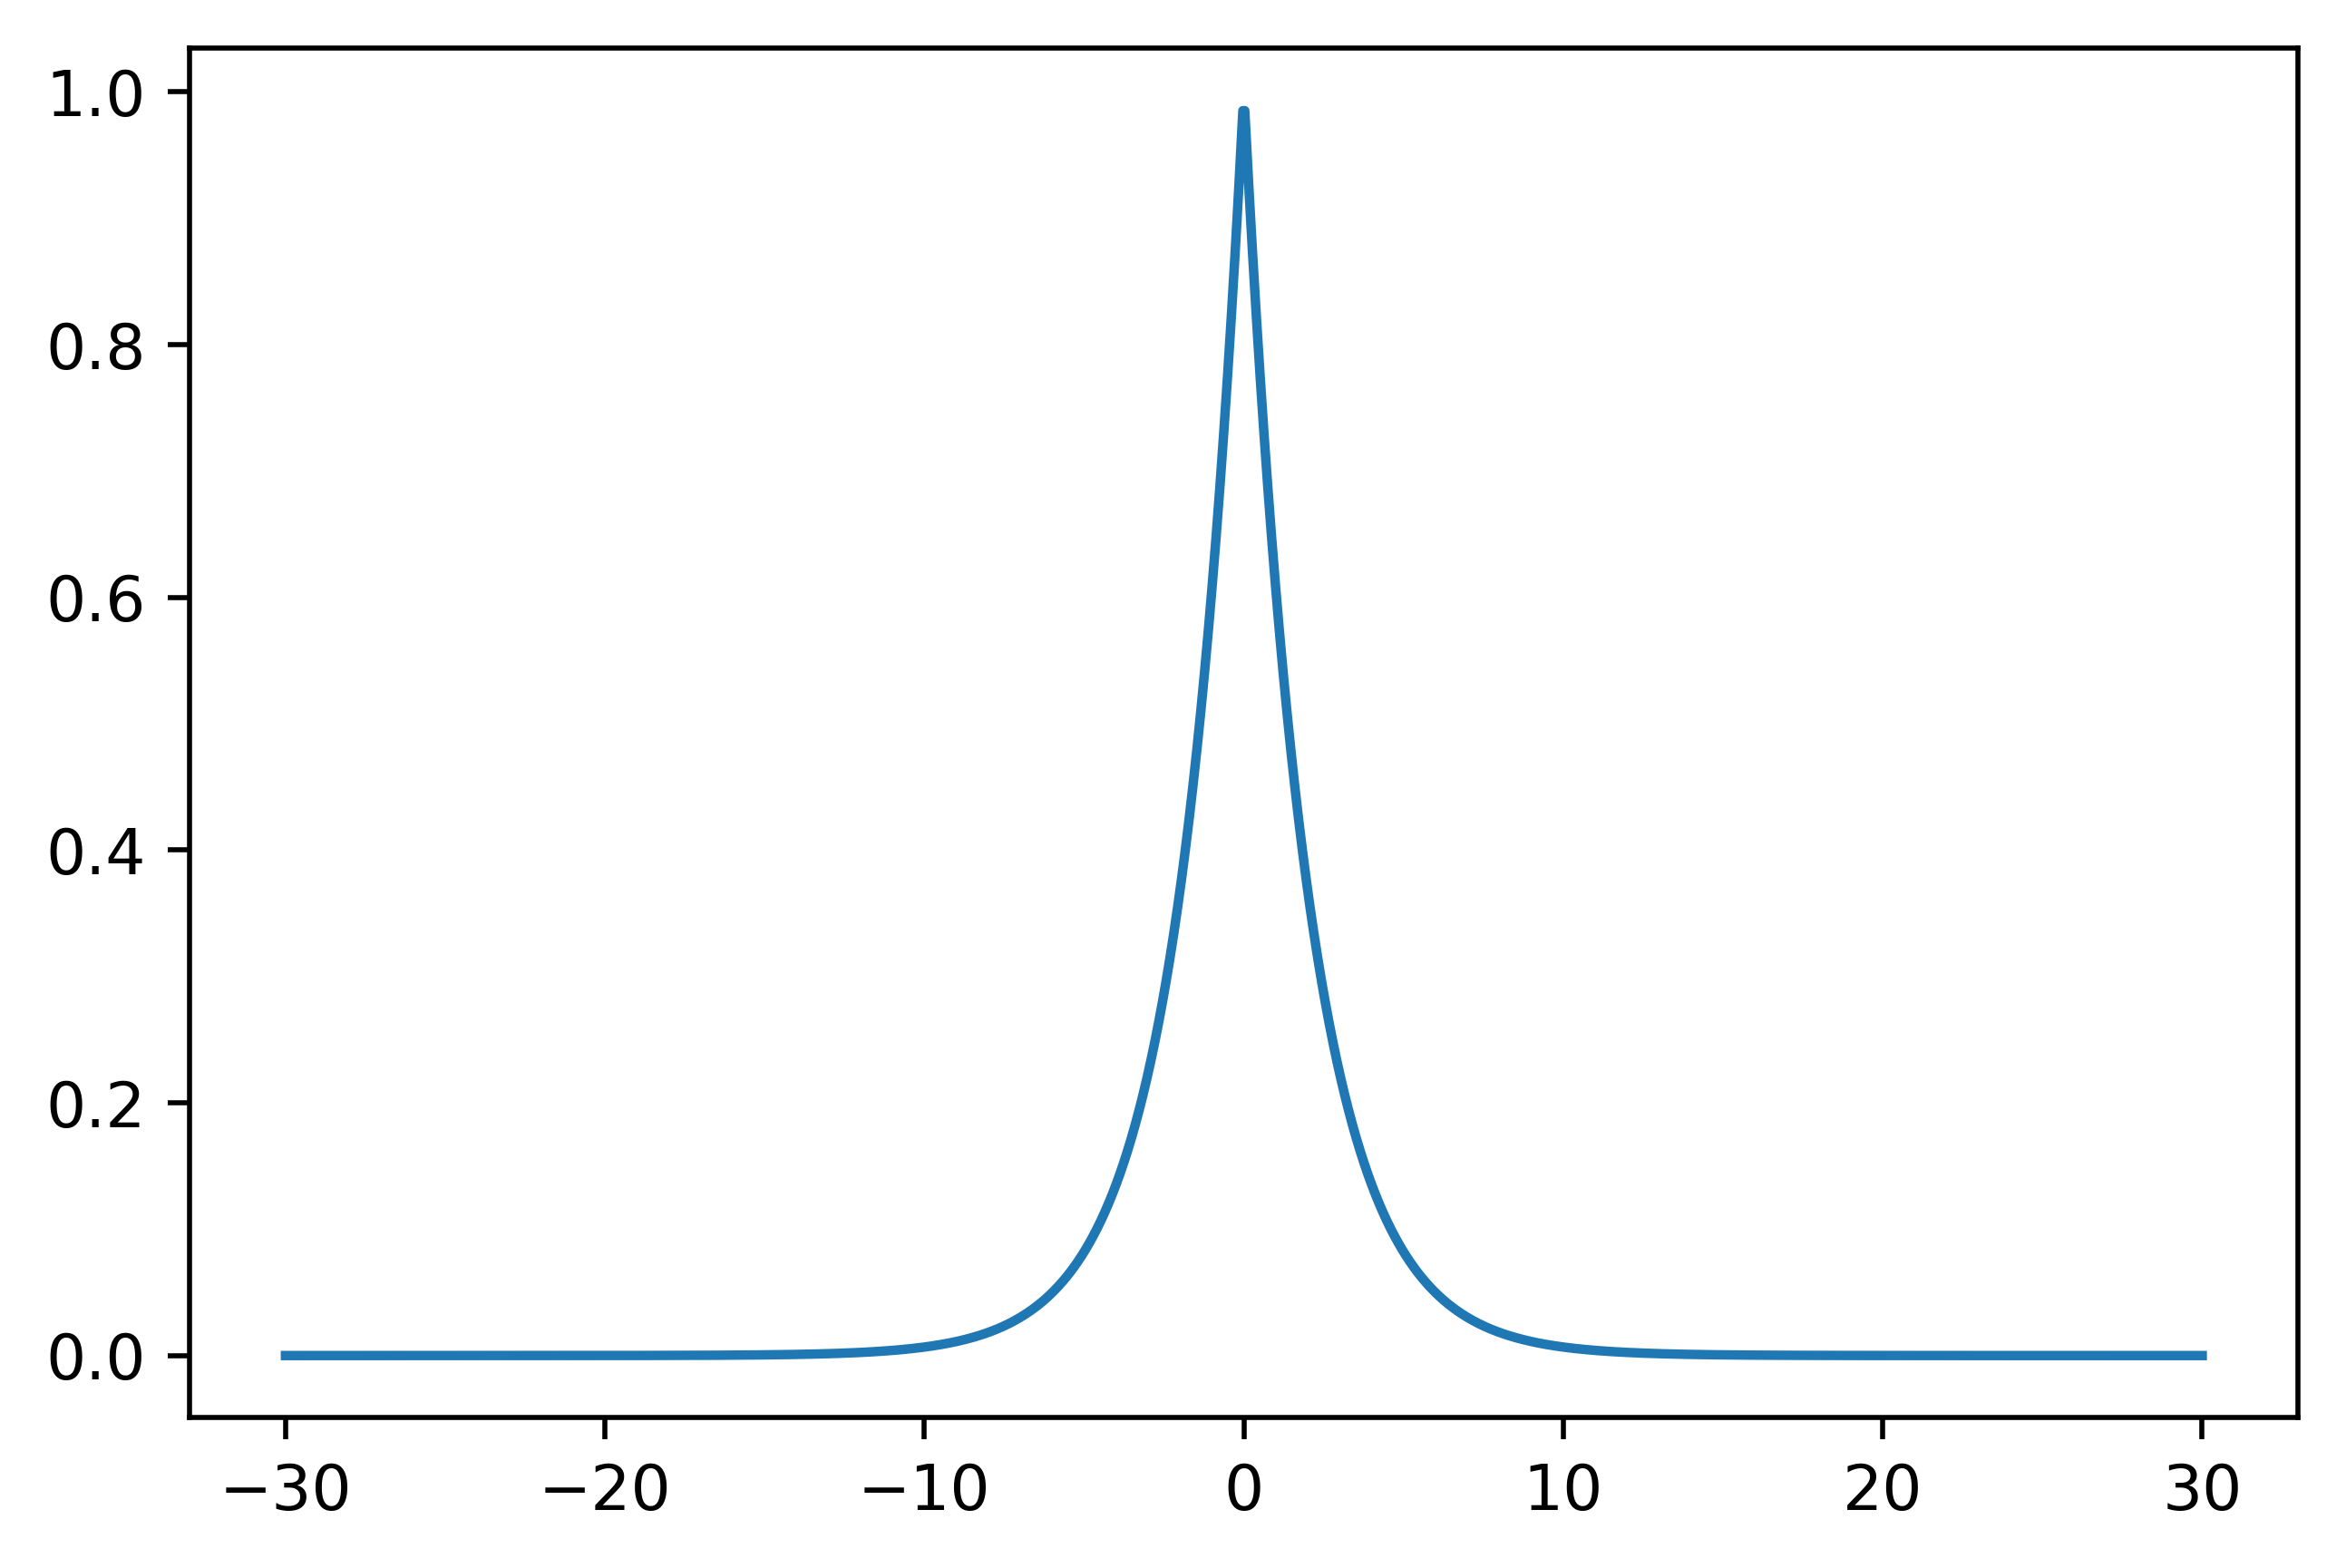

In [22]:
fig = plt.figure('gauss', dpi=500)
ax = fig.add_subplot(111)
mu = 0
left_std = 2
right_std = 4
x = np.linspace(-30,30,1000) - mu
y = np.copy(x)
#y[x>0] = y[x>0]/right_std
#y[x<0] = y[x<0]/left_std
y = np.sqrt(np.abs(y))
ax.plot(x, np.exp(-np.power(y,2)/2))